# Assignment 3 
u6664231

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Question 1  Git in practice 

See commit history on public repo: https://github.com/gkb21/ASTR4004_assignment3

Also note for the first dozen or so commits I was playing around with how branching and merging worked and what I could and couldn't do so sorry for the chaos  

## Question 2 Using ADQL to Search for Bright Stars Around the Open Cluster M67

A colleague is interested in the open cluster Messier 67 (RA = 132.825 deg, Dec = 11.8 deg)
and is considering an observation proposal using the 2dF fibre positioner and HERMES
spectrograph (effective for Gaia G band magnitudes < 14). They need to know if there
are enough bright stars in this region for observation. Your task is to assist by querying
data from Gaia DR3 and performing some basic analysis.

#### Download all stars within 1 degree of the center of Messier 67 that are brighter than G = 14 in Gaia DR3 (the table is called gaiadr gaia source) and include a crossmatch these stars with the 2MASS catalog and report your ADQL query text (use the """query""" notation)

In [2]:
from astroquery.gaia import Gaia
import pandas as pd
from astropy.table import Table

# Define the center of Messier 67
ra_m67 = 132.825   # Right Ascension in degrees
dec_m67 = 11.8 # Declination in degrees
radius = 1.0  # Search radius in degrees
mag_limit = 14  # Magnitude limit

'''
This is a query for stars that are 1 degree of the center of Messier 67 that are brighterthan G = 14
from Gaia DR3 with a 2mass crossmatch
'''
gaia_2mass_crossmatch_query = f"""
SELECT *
FROM gaiadr3.gaia_source AS gaia
JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id)
JOIN gaiaedr3.tmass_psc_xsc_join AS xjoin USING (clean_tmass_psc_xsc_oid)
JOIN gaiadr1.tmass_original_valid AS tmass
    ON xjoin.original_psc_source_id = tmass.designation

WHERE CONTAINS(
        POINT(gaia.ra, gaia.dec), 
        CIRCLE({ra_m67}, {dec_m67}, {radius})
    ) = 1
    AND gaia.phot_g_mean_mag < {mag_limit}
ORDER BY gaia.phot_g_mean_mag

"""

# Runs the ADQL query for 'gaia_2mass_crossmatch_query'
job = Gaia.launch_job(gaia_2mass_crossmatch_query ) 
results = job.get_results()
# Convert to pandas data frame   
gaia_2mass_crossmatch_query_data_table = results.to_pandas()
gaia_2mass_crossmatch_query_data_table


solution_id                  DESIGNATION  random_index  \
0     1636148068921376768  Gaia DR3 608020176290124544     365257723   
1     1636148068921376768  Gaia DR3 598677041873269888     347884130   
2     1636148068921376768  Gaia DR3 604920240695111424     441504422   
3     1636148068921376768  Gaia DR3 604992258706635520     554171204   
4     1636148068921376768  Gaia DR3 604684326730942592     803047084   
...                   ...                          ...           ...   
1013  1636148068921376768  Gaia DR3 608127481752974720     135826423   
1014  1636148068921376768  Gaia DR3 604901652076632960    1318611312   
1015  1636148068921376768  Gaia DR3 604972226979105664     837264516   
1016  1636148068921376768  Gaia DR3 607987736401416576     711162152   
1017  1636148068921376768  Gaia DR3 598890381488889088     503374393   

      ref_epoch          ra  ra_error        dec  dec_error   parallax  \
0        2016.0  132.164662  0.035635  12.546939   0.019973   2.690377   
1        2016.0  132.984712  0.017493  11.135822   0.009685   2.957272   
2        2016.0  132.955583  0.036204  11.894179   0.018463   3.439539   
3        2016.0  132.390877  0.021266  12.170843   0.011679  16.694127   
4        2016.0  133.126921  0.020579  11.258977   0.011613   1.163059   
...         ...         ...       ...        ...        ...        ...   
1013     2016.0  132.952514  0.017030  12.722496   0.008999   0.795769   
1014     2016.0  133.173432  0.021976  11.724561   0.011698   0.823073   
1015     2016.0  132.762102  0.016513  12.006010   0.009210   2.421484   
1016     2016.0  132.212888  0.040465  12.134974   0.021271   0.743423   
1017     2016.0  132.730019  0.018325  11.520704   0.009360   1.177810   

      parallax_error  ...  err_min  err_ang     j_m  j_msigcom     h_m  \
0           0.046984  ...     0.29        0   3.036      0.240   2.091   
1           0.022465  ...     0.09        0   5.394      0.020   4.612   
2           0.046226  ...     0.06       90   5.889      0.019   5.409   
3           0.024884  ...     0.06       90   6.723      0.019   6.520   
4           0.026148  ...     0.08       90   5.392      0.052   4.687   
...              ...  ...      ...      ...     ...        ...     ...   
1013        0.019686  ...     0.06        0  12.576      0.022  12.105   
1014        0.026205  ...     0.06       90  12.650      0.025  12.155   
1015        0.019692  ...     0.06        0  12.640      0.022  12.188   
1016        0.043513  ...     0.06       90  12.822      0.022  12.431   
1017        0.020921  ...     0.06       90  13.009      0.021  12.750   

      h_msigcom    ks_m  ks_msigcom  ext_key        j_date  
0         0.196   1.903       0.236     <NA>  2.451115e+06  
1         0.292   4.686       0.020     <NA>  2.450769e+06  
2         0.029   5.232       0.017     <NA>  2.450769e+06  
3         0.026   6.467       0.017     <NA>  2.450768e+06  
4         0.040   4.364       0.036     <NA>  2.451591e+06  
...         ...     ...         ...      ...           ...  
1013      0.022  12.036       0.021     <NA>  2.450768e+06  
1014      0.031  12.098       0.024     <NA>  2.451587e+06  
1015      0.022  12.030       0.021     <NA>  2.450768e+06  
1016      0.021  12.342       0.018     <NA>  2.451135e+06  
1017      0.023  12.643       0.024     <NA>  2.450769e+06  

[1018 rows x 176 columns]

#### Determine how many stars are returned from the initial query.a

In [3]:
# Determines how many stars are in the filtered data set via checking the len of the amount of entries
num_stars = len(gaia_2mass_crossmatch_query_data_table)
print(f"Number of stars brighter than G={mag_limit} within 1 degree of M67: {num_stars}") # prints number of stars 

1049463862.py: Number of stars brighter than G=14 within 1 degree of M67: 1018


#### Identify any stars with bad 2MASS photometry, where ph qual is not ’AAA’.

In [4]:
'''
Filter the stars where ph_qual is NOT 'AAA' leaving behind 
only the bad 2MASS photometry stars using pandas query
'''
bad_photometry_stars = gaia_2mass_crossmatch_query_data_table.query("ph_qual != 'AAA'")
# Determines how many stars are in the filtered data set via checking the len of the amount of entries
num_bad_photometry_stars = len(bad_photometry_stars)
print(num_bad_photometry_stars) # prints the number of bad 2MASS photometry stars
print(bad_photometry_stars) # prints a table of bad 2MASS photometry stars 


2318596945.py: 21
2318596945.py:              solution_id                  DESIGNATION  random_index  \
0    1636148068921376768  Gaia DR3 608020176290124544     365257723   
1    1636148068921376768  Gaia DR3 598677041873269888     347884130   
4    1636148068921376768  Gaia DR3 604684326730942592     803047084   
22   1636148068921376768  Gaia DR3 605101037342309376    1275034334   
24   1636148068921376768  Gaia DR3 598689102141448320     446746802   
25   1636148068921376768  Gaia DR3 598955115237068032     594867401   
69   1636148068921376768  Gaia DR3 604950271106216064     156518440   
97   1636148068921376768  Gaia DR3 604911268507711232    1004522431   
173  1636148068921376768  Gaia DR3 604917835513458688     941052385   
314  1636148068921376768  Gaia DR3 604713459494948352     532598536   
403  1636148068921376768  Gaia DR3 598689102142789760    1573797226   
435  1636148068921376768  Gaia DR3 604636321880758144     383307719   
464  1636148068921376768  Gaia DR3 598921030

In [5]:
# All the stars with bad 2MASS photometry
print(bad_photometry_stars['DESIGNATION'])

1949986983.py: 0      Gaia DR3 608020176290124544
1      Gaia DR3 598677041873269888
4      Gaia DR3 604684326730942592
22     Gaia DR3 605101037342309376
24     Gaia DR3 598689102141448320
25     Gaia DR3 598955115237068032
69     Gaia DR3 604950271106216064
97     Gaia DR3 604911268507711232
173    Gaia DR3 604917835513458688
314    Gaia DR3 604713459494948352
403    Gaia DR3 598689102142789760
435    Gaia DR3 604636321880758144
464    Gaia DR3 598921030375475200
558    Gaia DR3 604917831219174528
569    Gaia DR3 604921202767811712
592    Gaia DR3 598925943818062208
641    Gaia DR3 604904847532342528
660    Gaia DR3 598896841119762816
803    Gaia DR3 604904847532342272
900    Gaia DR3 598921030375475072
928    Gaia DR3 608019317296666624
Name: DESIGNATION, dtype: object


#### Identify any stars with negative (or non-positive) parallaxes in the Gaia data.

In [6]:
# Filter to leave only negative parallaxes and null parallaxes in our data set using pandas query 
negative_parallax_stars = gaia_2mass_crossmatch_query_data_table.query('parallax.isnull() or parallax <= 0')
# Determines how many stars are in the filtered data set via checking the len of the amount of entries 
num_bad_photometry_stars = len(negative_parallax_stars)
print(num_bad_photometry_stars) #prints the num of stars with egative parallaxes and null parallaxes
print(negative_parallax_stars) # prints pandas table of stars 

1152096193.py: 9
1152096193.py:              solution_id                  DESIGNATION  random_index  \
86   1636148068921376768  Gaia DR3 604917663716360576     324647624   
155  1636148068921376768  Gaia DR3 604921546365012480     131241535   
179  1636148068921376768  Gaia DR3 604921542069455104     544905365   
243  1636148068921376768  Gaia DR3 598886739356653696    1501496757   
295  1636148068921376768  Gaia DR3 598873953238690816      49906729   
534  1636148068921376768  Gaia DR3 604918282190043648    1391376225   
754  1636148068921376768  Gaia DR3 598847569256078464     314066461   
832  1636148068921376768  Gaia DR3 598892580511613312     683012459   
945  1636148068921376768  Gaia DR3 598892580512198144    1004824233   

     ref_epoch          ra   ra_error        dec  dec_error  parallax  \
86      2016.0  132.861743   7.256874  11.811254   3.914955       NaN   
155     2016.0  132.836633   5.527748  11.890591   3.062133       NaN   
179     2016.0  132.836514   0.798105 

#### Apply these two quality cuts (removing stars with bad 2MASS photometry and non-positive parallaxes). After applying the cuts, determine how many stars remain.

In [7]:
'''
Filter out both negative parallaxes and null parallaxes using pandas query as well
as making sure that stars don't have bad 2MASS photometry using pandas query 
'''
filtered_gaia_2mass_crossmatch_query_data= gaia_2mass_crossmatch_query_data_table.query("ph_qual == 'AAA' and parallax.notnull() and parallax > 0")
# Determines how many stars are in the filtered data set via checking the len of the amount of entries
filtered_num_stars = len(filtered_gaia_2mass_crossmatch_query_data)
# prints the amount of filtered stars 
print(f"Number of stars brighter than G={mag_limit} within 1 degree of M67 that are ph_qual AAA quality and parallax is not <0 or nan: {filtered_num_stars}")


3150013278.py: Number of stars brighter than G=14 within 1 degree of M67 that are ph_qual AAA quality and parallax is not <0 or nan: 988


In [8]:
for column in gaia_2mass_crossmatch_query_data_table.columns:
    print(column)

2638239968.py: solution_id
2638239968.py: DESIGNATION
2638239968.py: random_index
2638239968.py: ref_epoch
2638239968.py: ra
2638239968.py: ra_error
2638239968.py: dec
2638239968.py: dec_error
2638239968.py: parallax
2638239968.py: parallax_error
2638239968.py: parallax_over_error
2638239968.py: pm
2638239968.py: pmra
2638239968.py: pmra_error
2638239968.py: pmdec
2638239968.py: pmdec_error
2638239968.py: ra_dec_corr
2638239968.py: ra_parallax_corr
2638239968.py: ra_pmra_corr
2638239968.py: ra_pmdec_corr
2638239968.py: dec_parallax_corr
2638239968.py: dec_pmra_corr
2638239968.py: dec_pmdec_corr
2638239968.py: parallax_pmra_corr
2638239968.py: parallax_pmdec_corr
2638239968.py: pmra_pmdec_corr
2638239968.py: astrometric_n_obs_al
2638239968.py: astrometric_n_obs_ac
2638239968.py: astrometric_n_good_obs_al
2638239968.py: astrometric_n_bad_obs_al
2638239968.py: astrometric_gof_al
2638239968.py: astrometric_chi2_al
2638239968.py: astrometric_excess_noise
2638239968.py: astrometric_excess_no

#### Using the remaining stars, generate a figure with two panels (1 point per panel):
- (a) A color-magnitude diagram (CMD) of Gaia BP-RP vs. absolute G magnitude.
- (b) A 2MASS J-Ks vs. apparent K magnitude diagram.


/var/folders/0t/xyyygz554szbmg5w8w3nq53m0000gn/T/ipykernel_93425/3813827518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gaia_2mass_crossmatch_query_data['distance'] = 1 / (filtered_gaia_2mass_crossmatch_query_data['parallax']/1000)  # Convert parallax from milliarcseconds to arcseconds
/var/folders/0t/xyyygz554szbmg5w8w3nq53m0000gn/T/ipykernel_93425/3813827518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gaia_2mass_crossmatch_query_data['M_g'] = filtered_gaia_2mass_crossmatc

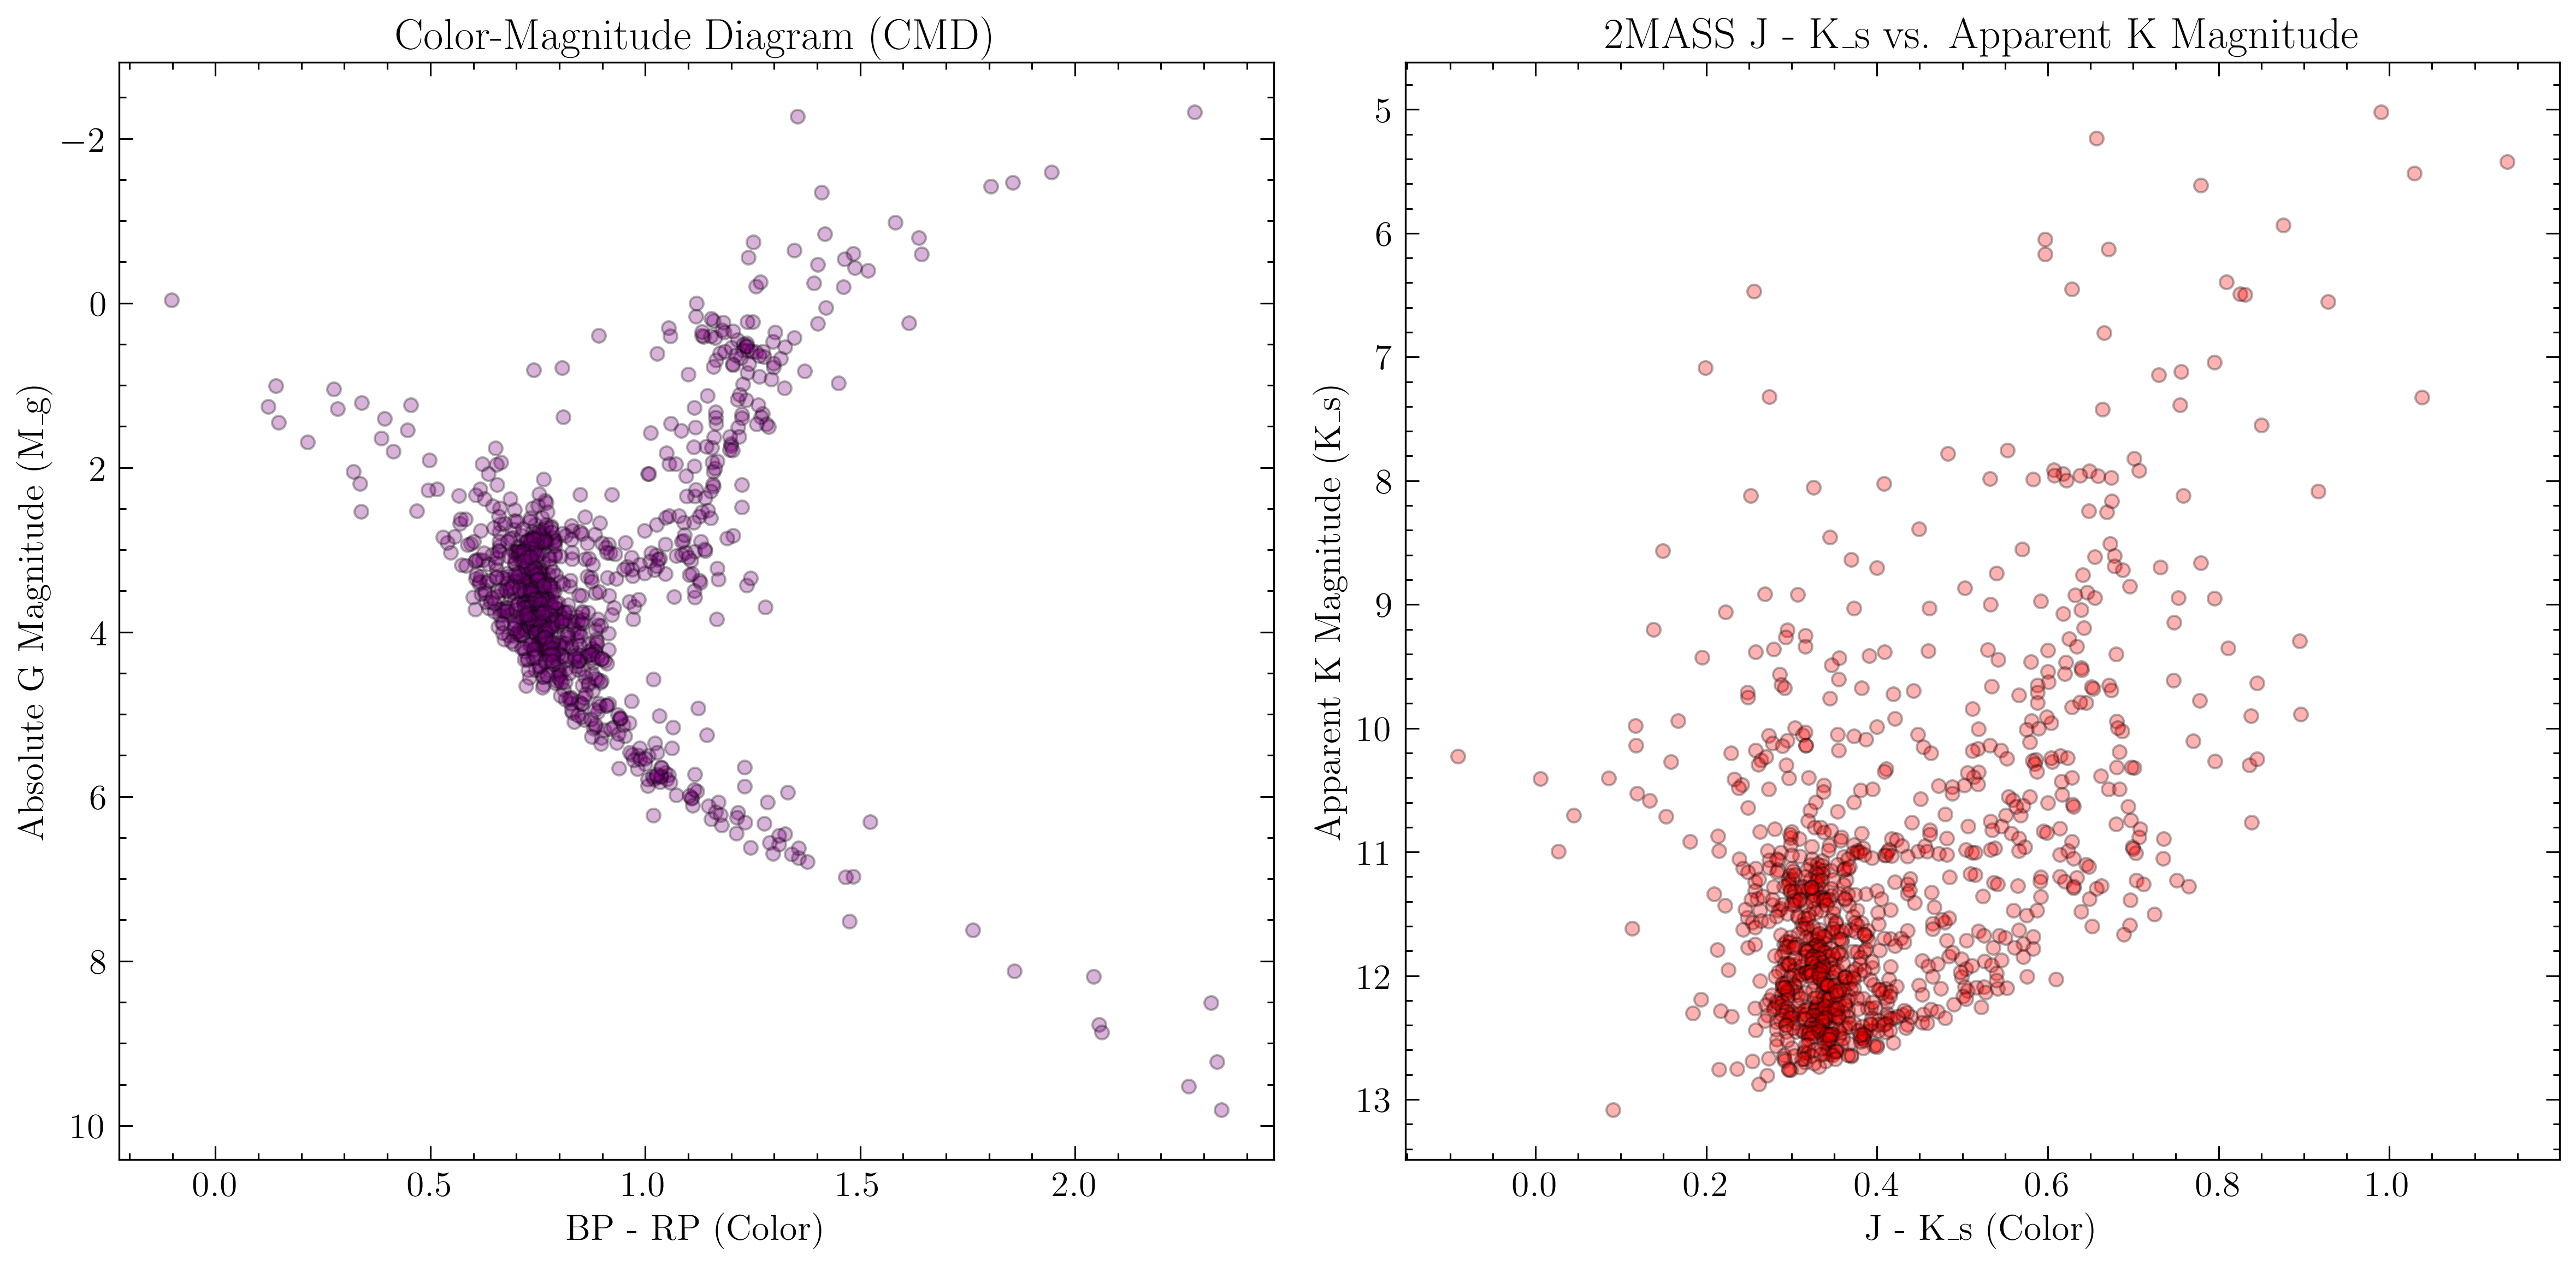

In [9]:
#Calculate Distance and Absolute Magnitude for CMD
filtered_gaia_2mass_crossmatch_query_data['distance'] = 1 / (filtered_gaia_2mass_crossmatch_query_data['parallax']/1000)  # Convert parallax from milliarcseconds to arcseconds
filtered_gaia_2mass_crossmatch_query_data['M_g'] = filtered_gaia_2mass_crossmatch_query_data['phot_g_mean_mag'] - 5 * (np.log10(filtered_gaia_2mass_crossmatch_query_data['distance']) - 1)
filtered_gaia_2mass_crossmatch_query_data['BP_RP'] = filtered_gaia_2mass_crossmatch_query_data['phot_bp_mean_mag'] - filtered_gaia_2mass_crossmatch_query_data['phot_rp_mean_mag']

#Calculate J - K_s for 2MASS
filtered_gaia_2mass_crossmatch_query_data['J_Ks'] = filtered_gaia_2mass_crossmatch_query_data['j_m'] - filtered_gaia_2mass_crossmatch_query_data['ks_m']



#Create the figure with two panels
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

#First panel: Color-Magnitude Diagram
axs[0].scatter(filtered_gaia_2mass_crossmatch_query_data['BP_RP'] , filtered_gaia_2mass_crossmatch_query_data['M_g'], c='purple', alpha=0.3, edgecolors='k')
axs[0].invert_yaxis()  # Invert y-axis to have brighter stars at the top
axs[0].set_xlabel('BP - RP (Color)')
axs[0].set_ylabel('Absolute G Magnitude (M_g)')
axs[0].set_title('Color-Magnitude Diagram (CMD)')

#Second panel (b): 2MASS J-Ks vs. Apparent K Magnitude
axs[1].scatter(filtered_gaia_2mass_crossmatch_query_data['J_Ks'], filtered_gaia_2mass_crossmatch_query_data['ks_m'], c='red', alpha=0.3, edgecolors='k')
axs[1].invert_yaxis()  # Invert y-axis to have brighter stars at the top
axs[1].set_xlabel('J - K_s (Color)')
axs[1].set_ylabel('Apparent K Magnitude (K_s)')
axs[1].set_title('2MASS J - K_s vs. Apparent K Magnitude')


# Show the figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('figures/cmds_M67.png', bbox_inches='tight',dpi=200)
plt.show()

#### Save the figure as figures/cmds_M67.png with a resolution of 200 dots per inch

This was done above in the follow command: plt.savefig('figures/cmds_M67.png', bbox_inches='tight',dpi=200)

#### Give your colleague a recommendation for the potential proposal when only judging the fibre usage.

During our Query we found that their were 988 stars 1 degree of the center of Messier 67 that are brighter than G = 14. 

The potential proposal might run into a problem due the number of fibres on the 2dF Instrument.From https://aat.anu.edu.au/public/2df-instrument: we find that the 2dF Instrument have two field plates that each have 392 fibres to position, which means 392 spectra can be taken. So based on this within the field we are looking at there are about 26% more stars. Making it a good overall propsal since you are not leaving any fibres on the table and there is not a over use of them either.

However if you wanted to be more effeient with your time you could either use a telescope with a larger fibre count or have a smaller radius for the observation centered on M67. 


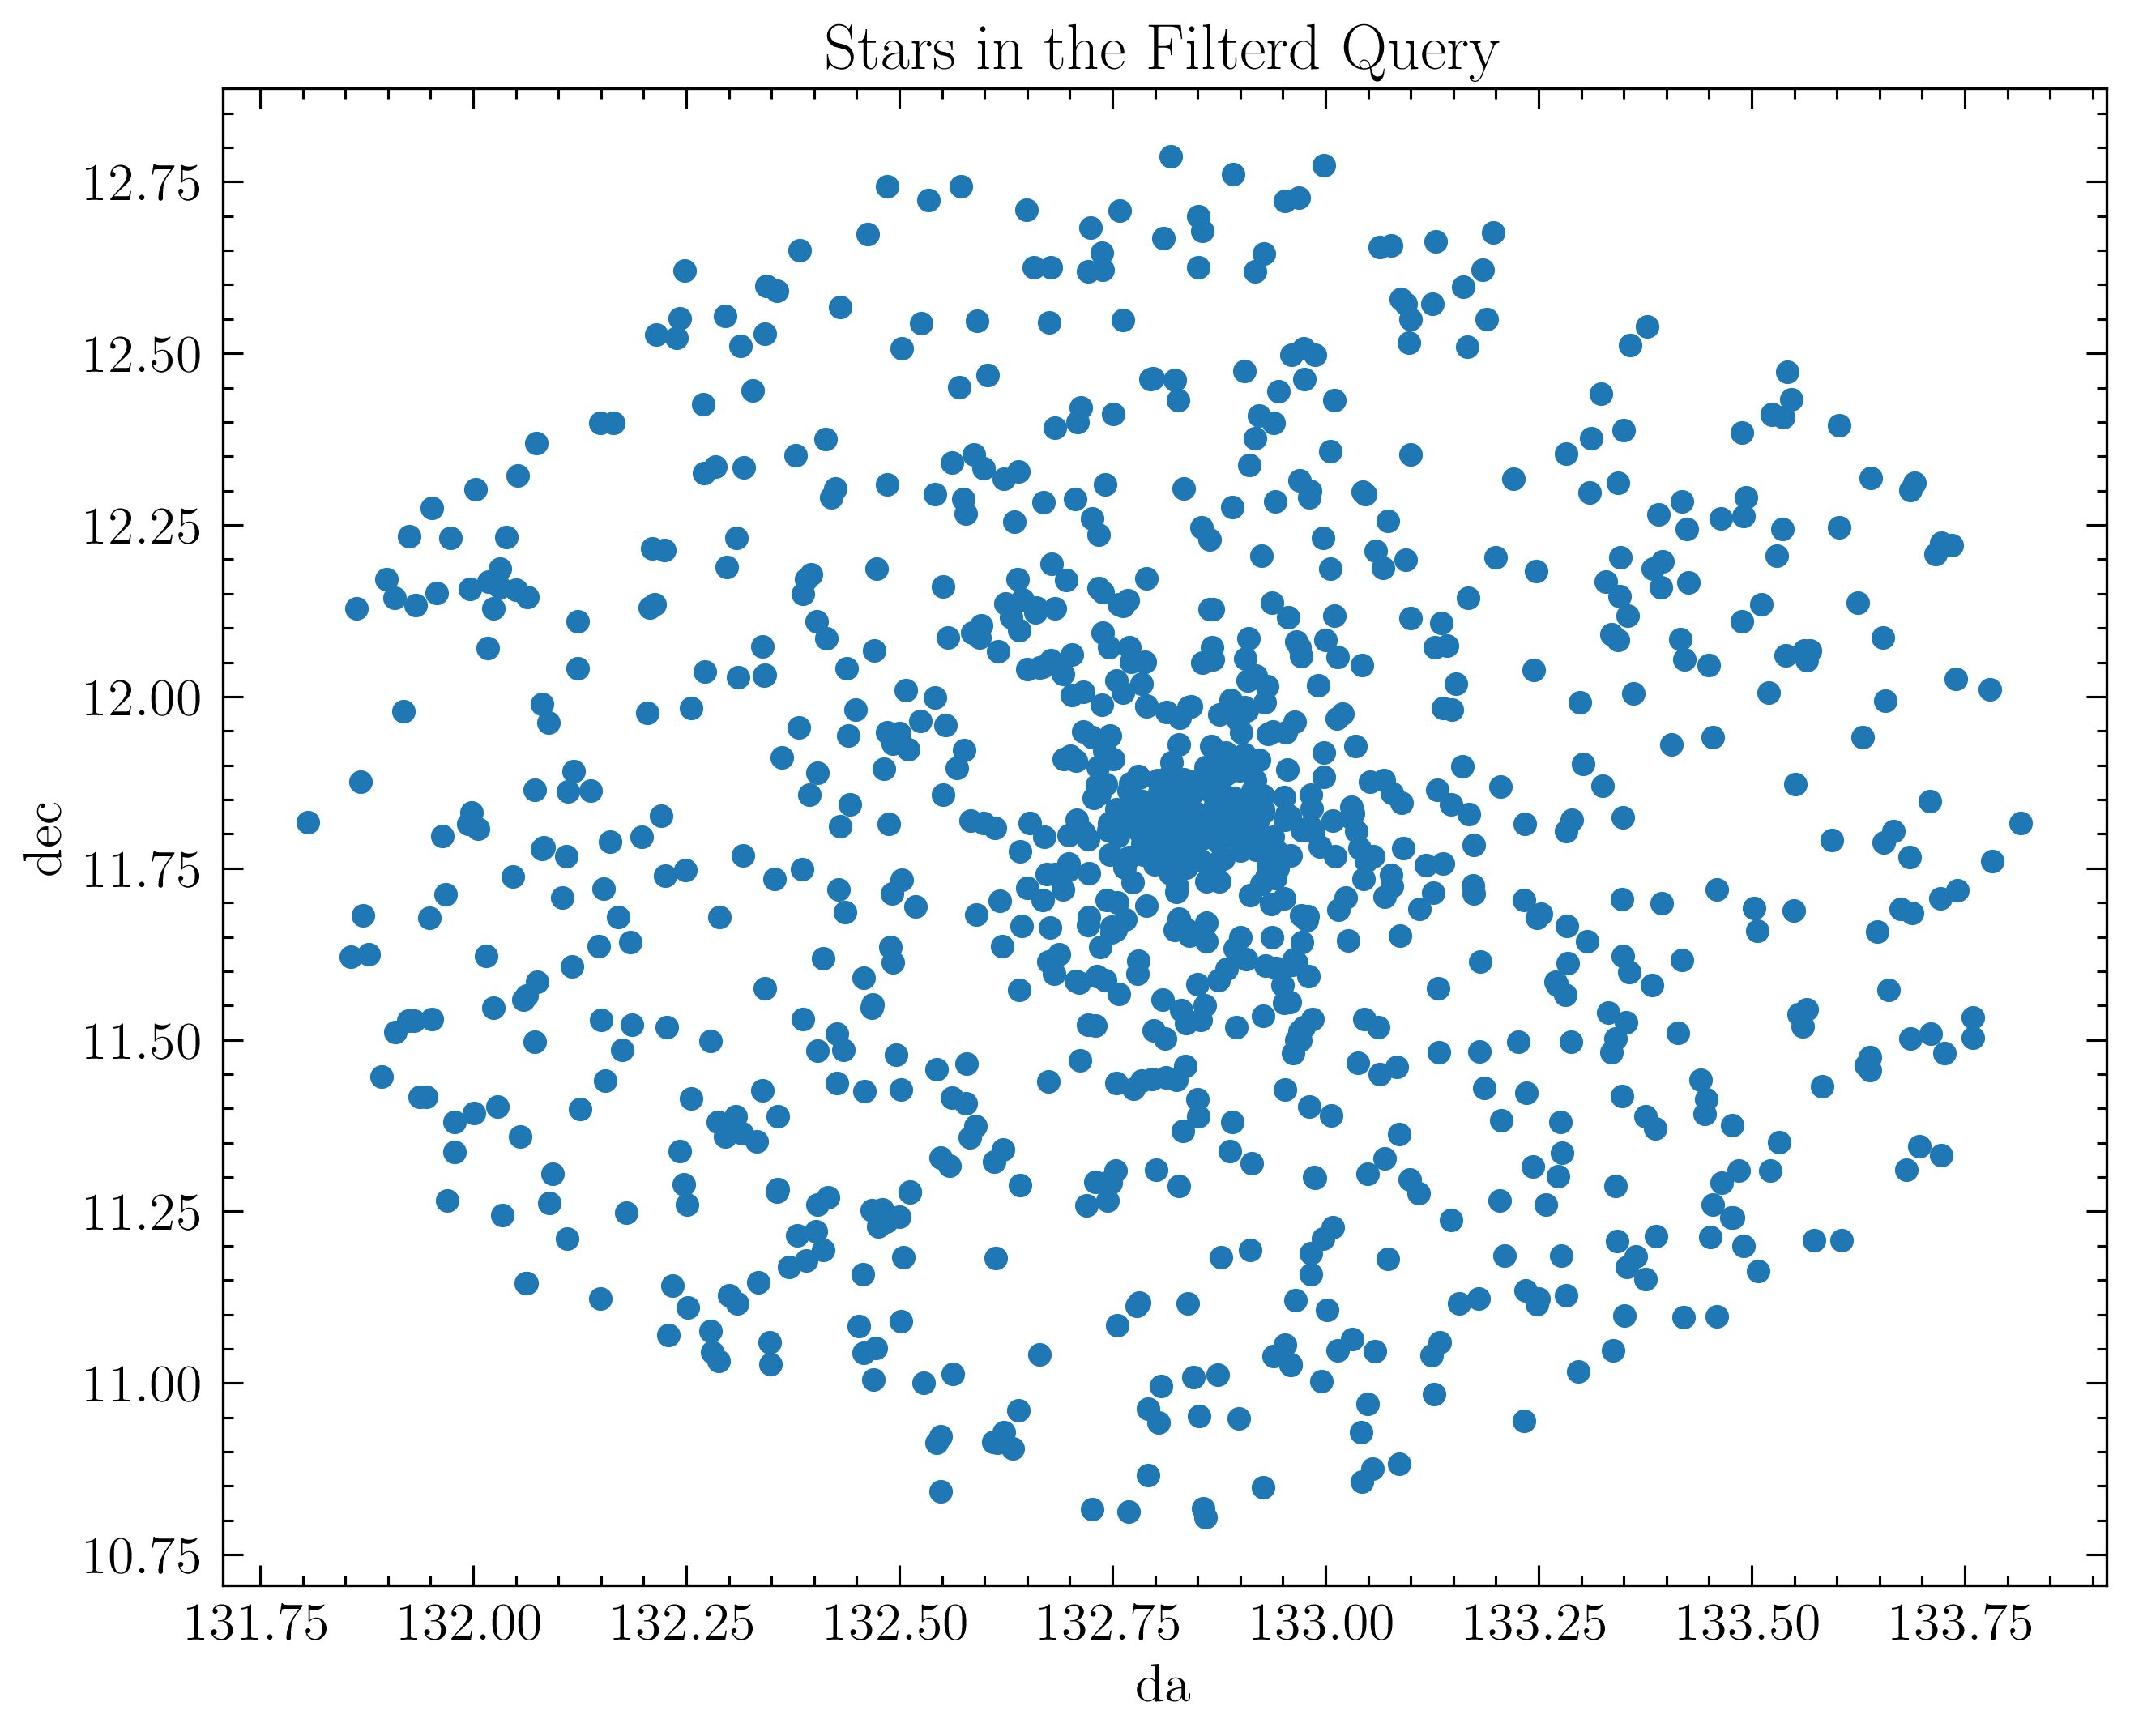

In [10]:
plt.scatter(filtered_gaia_2mass_crossmatch_query_data['ra'],filtered_gaia_2mass_crossmatch_query_data['dec'])
plt.xlabel('da')
plt.ylabel('dec')
plt.title("Stars in the Filterd Query")
plt.show()

## Question 3 The radial metallicity relation in simulated data 

The radial metallicity relation is a function that describes the change of metallicity -
here the gas phase metallicity $A(O) = log10(NO/NH) + 12$ - along the galactocentric
radius $R_{Gal}$.. Understanding the radial metallicity gradient in galaxies provides critical
insights into their formation and evolutionary processes, such as inside-out formation,
gas accretion, outflows, and radial migration. A lot of work has been done through
observational studies (e.g. Ho et al., 2017, ApJ, 846, 39) and a few simulations (e.g.
Grand et al., 2016, MNRAS, 460, 94), but more works needs to be done to understand
the radial metallicity gradient!
Your colleague has just finished an exciting cosmological simulation that traces the
gas phase metallicity for a Milky Way analogue, that is, a spiral galaxy. They have
limited the simulation data to the positions (x, y, z) of the innermost gas particles
(RGal. < 25 kpc) and their gas phase metallicity A(O) and uploaded them as a FITS
file for you here: https://github.com/svenbuder/astr4004_2024_week7/blob/main/data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits

In [11]:
# Import modules
from astropy.table import Table # this works well for FITS data catalogues
from astropy.io import fits # this is your more agnostic way to work for FITS images
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

#### - Download the file from the link above into **data/**. Load the file with python and then perform the following tasks to create figures that are saved in **figures/**:

In [12]:
# FITS Images
fits_file = fits.open('data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits', ignore_missing_simple=True) # Open fits file
print(fits_file)

3266727671.py: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x33bd38510>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x33d2f8390>]


In [13]:
print(fits_file.info()) #Information for this fits file

Filename: data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (678,)   uint8   
  1  /Users/buder/Simulations/preparing_NIHAO/NIHAO_prepared/NIHAO_g8.26e    1 BinTableHDU     21   511520R x 4C   [E, E, E, D]   
1045252056.py: None


In [14]:
#print the header for the Primary Extension
print(fits_file[0].header.items)

882215134.py: <bound method Header.items of SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                  678 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a per

In [15]:
# Put fits data into a table of x,y,z and A_0
data = fits_file[1].data
data_table = Table(data)
data_table

<Table length=511520>
     x           y           z             A_O       
  float32     float32     float32        float64     
----------- ----------- ----------- -----------------
  10.020546  -15.421509   -3.241711 8.428943189382553
 -13.487837   5.6635065  -0.8023056 8.671106847524642
   6.642289 -0.13894245  -0.5859607 8.891595783233642
 0.20393881   4.1123734 -0.14762174 8.977195146083831
 -20.824045    6.971037  -1.7580608 8.326950194835662
  5.3447924   18.439764   1.9853237 8.536727162599563
  22.162682    5.025803   2.6751451 8.323067548274993
  1.6786892    24.85231  0.67804474 8.362448933124542
  19.999903   3.7504601   1.1096945 8.336060168743133
        ...         ...         ...               ...
 -0.9178076   -1.833632 -0.23717117 9.094153168201446
 -0.7422366  -1.6049787 -0.14949895 9.139604213237762
 -0.7422366   -1.603936  -0.1486693 9.139604213237762
-0.74240154  -1.6039217 -0.14868727 9.139604213237762
  1.5331887  0.99755794  0.21667345 9.102035703659057
  1.5331887  0.99807924  0.21708827 9.102035703659057
  1.5321989   0.9981651  0.21698046 9.102035703659057
  1.6982036  -1.2077066  0.12108785 9.081204744577407
  1.6982036  -1.2066638  0.12191749 9.081204744577407
  1.6980386  -1.2066495  0.12189952 9.081204744577407

#### Plot a 2-panel figure:
- (a) Logarithmic density plot of RGal. vs. A(O), with a linear fit and legend.
- (b) Residuals of the fit, $R_{Gal}$. vs. $\Delta A(O)$.

In [16]:
mybins =70

In [17]:
# Calculate RGal from x, y, z positions
x = data_table['x']
y = data_table['y']
z = data_table['z']
A_O = data_table['A_O']
# Calculate RGal
RGal = np.sqrt(x**2 + y**2)

##### Linear Model

In [18]:
# Linear model
x_with_intercept = sm.add_constant(RGal)  # Adds the intercept term
linear_model = sm.OLS(A_O, x_with_intercept).fit()
linear_model.params

array([ 9.12783931, -0.03419647])

In [19]:
# Setting up model for plotting 
x_smooth = np.linspace(min(RGal), max(RGal), 500) # set up x coordinates 
linear_fit = linear_model.params[0] + linear_model.params[1] * x_smooth # set up y coodinates 


In [20]:
# Finds the residuals of the linear fit 
residuals = A_O - linear_model.predict(x_with_intercept)
intercept = linear_model.params[0] #intercept of linear model 
slope = linear_model.params[1] # slope of linear model
intercept_std_err = linear_model.bse[0]  # Standard error of intercept
slope_std_err = linear_model.bse[1]  # Standard error of slope

##### 2 Panel plot of:
First panel: Logarithmic density plot of RGal. vs. A(O), with a linear fit and legend.
Second panel: Residuals of the fit, $R_{Gal}$. vs. $\Delta A(O)$.

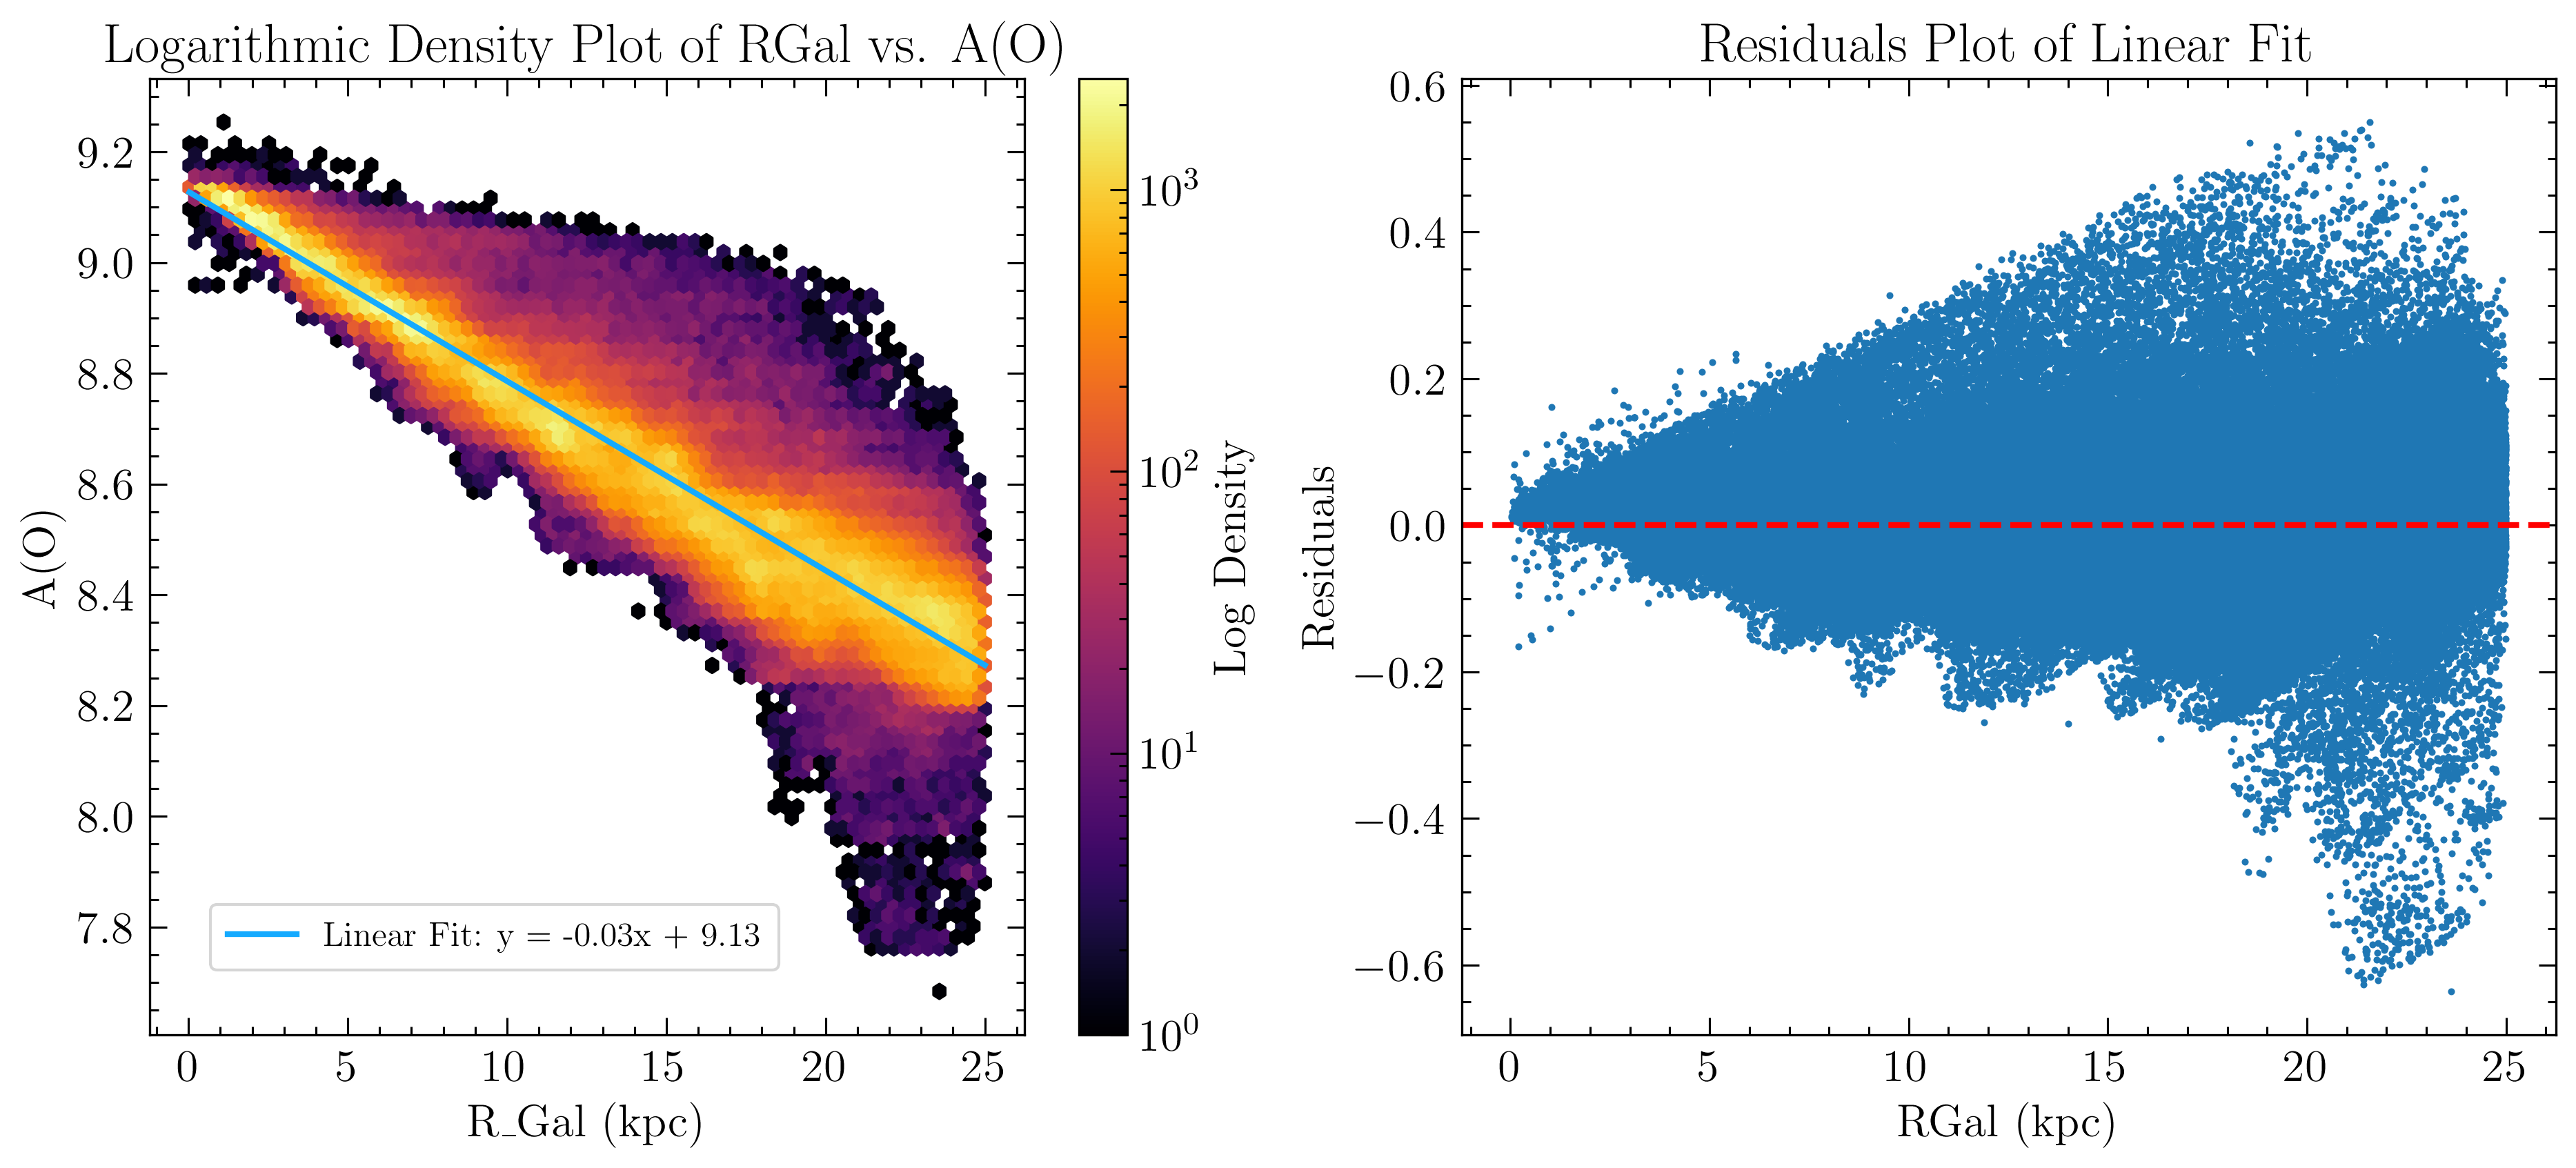

In [21]:
# Create the plot
# Create the figure
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)  # First subplot
ax2 = fig.add_subplot(122)  # Second subplot

# First Panel: Creates log density plot of Rgal and metallicity 
hb = ax1.hexbin(RGal, A_O, gridsize=mybins, cmap='inferno', bins='log')
line, = ax1.plot(x_smooth, linear_fit, label='Linear Fit', color=(0.078, 0.667, 1.0))
ax1.set_xlabel('R_Gal (kpc)')
ax1.set_ylabel('A(O)')
ax1.set_title('Logarithmic Density Plot of RGal vs. A(O)')
fit_label = f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}'
ax1.legend([line],[fit_label],bbox_to_anchor=(0.05, 0.05),loc="lower left", frameon=True, borderpad=0.5,fontsize='12')

# Second Panel: Plots the residuals of the linear fit
ax2.scatter(RGal, residuals, s=2, alpha=1)
ax2.axhline(0, color='red', linestyle='--', label='Zero Residual')
ax2.set_xlabel('RGal (kpc)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot of Linear Fit')



plt.colorbar(hb, ax=ax1, label='Log Density')
plt.savefig('figures/RGal_vs_AO.png', bbox_inches='tight',dpi=200) # Save the figure
plt.show()



#### Use a python fitting tool to fit a linear function to the data, reporting the intercept and slope with uncertainties. Include any hyperparameters used.

In [22]:
# Print linear model summary (with statistical info)
print(linear_model.summary())

1801571701.py:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 5.337e+06
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:51:31   Log-Likelihood:             6.1547e+05
No. Observations:              511520   AIC:                        -1.231e+06
Df Residuals:                  511518   BIC:                        -1.231e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1278      0.000   3.

In [23]:
print(f'Intercept: {intercept:.4f} ± {intercept_std_err:.4f}')
print(f'Slope: {slope:.4f} ± {slope_std_err:.4f}')

3172198961.py: Intercept: 9.1278 ± 0.0002
3172198961.py: Slope: -0.0342 ± 0.0000


##### Plot with linear fit to data again 

Same as before but a different way to plot residuals 

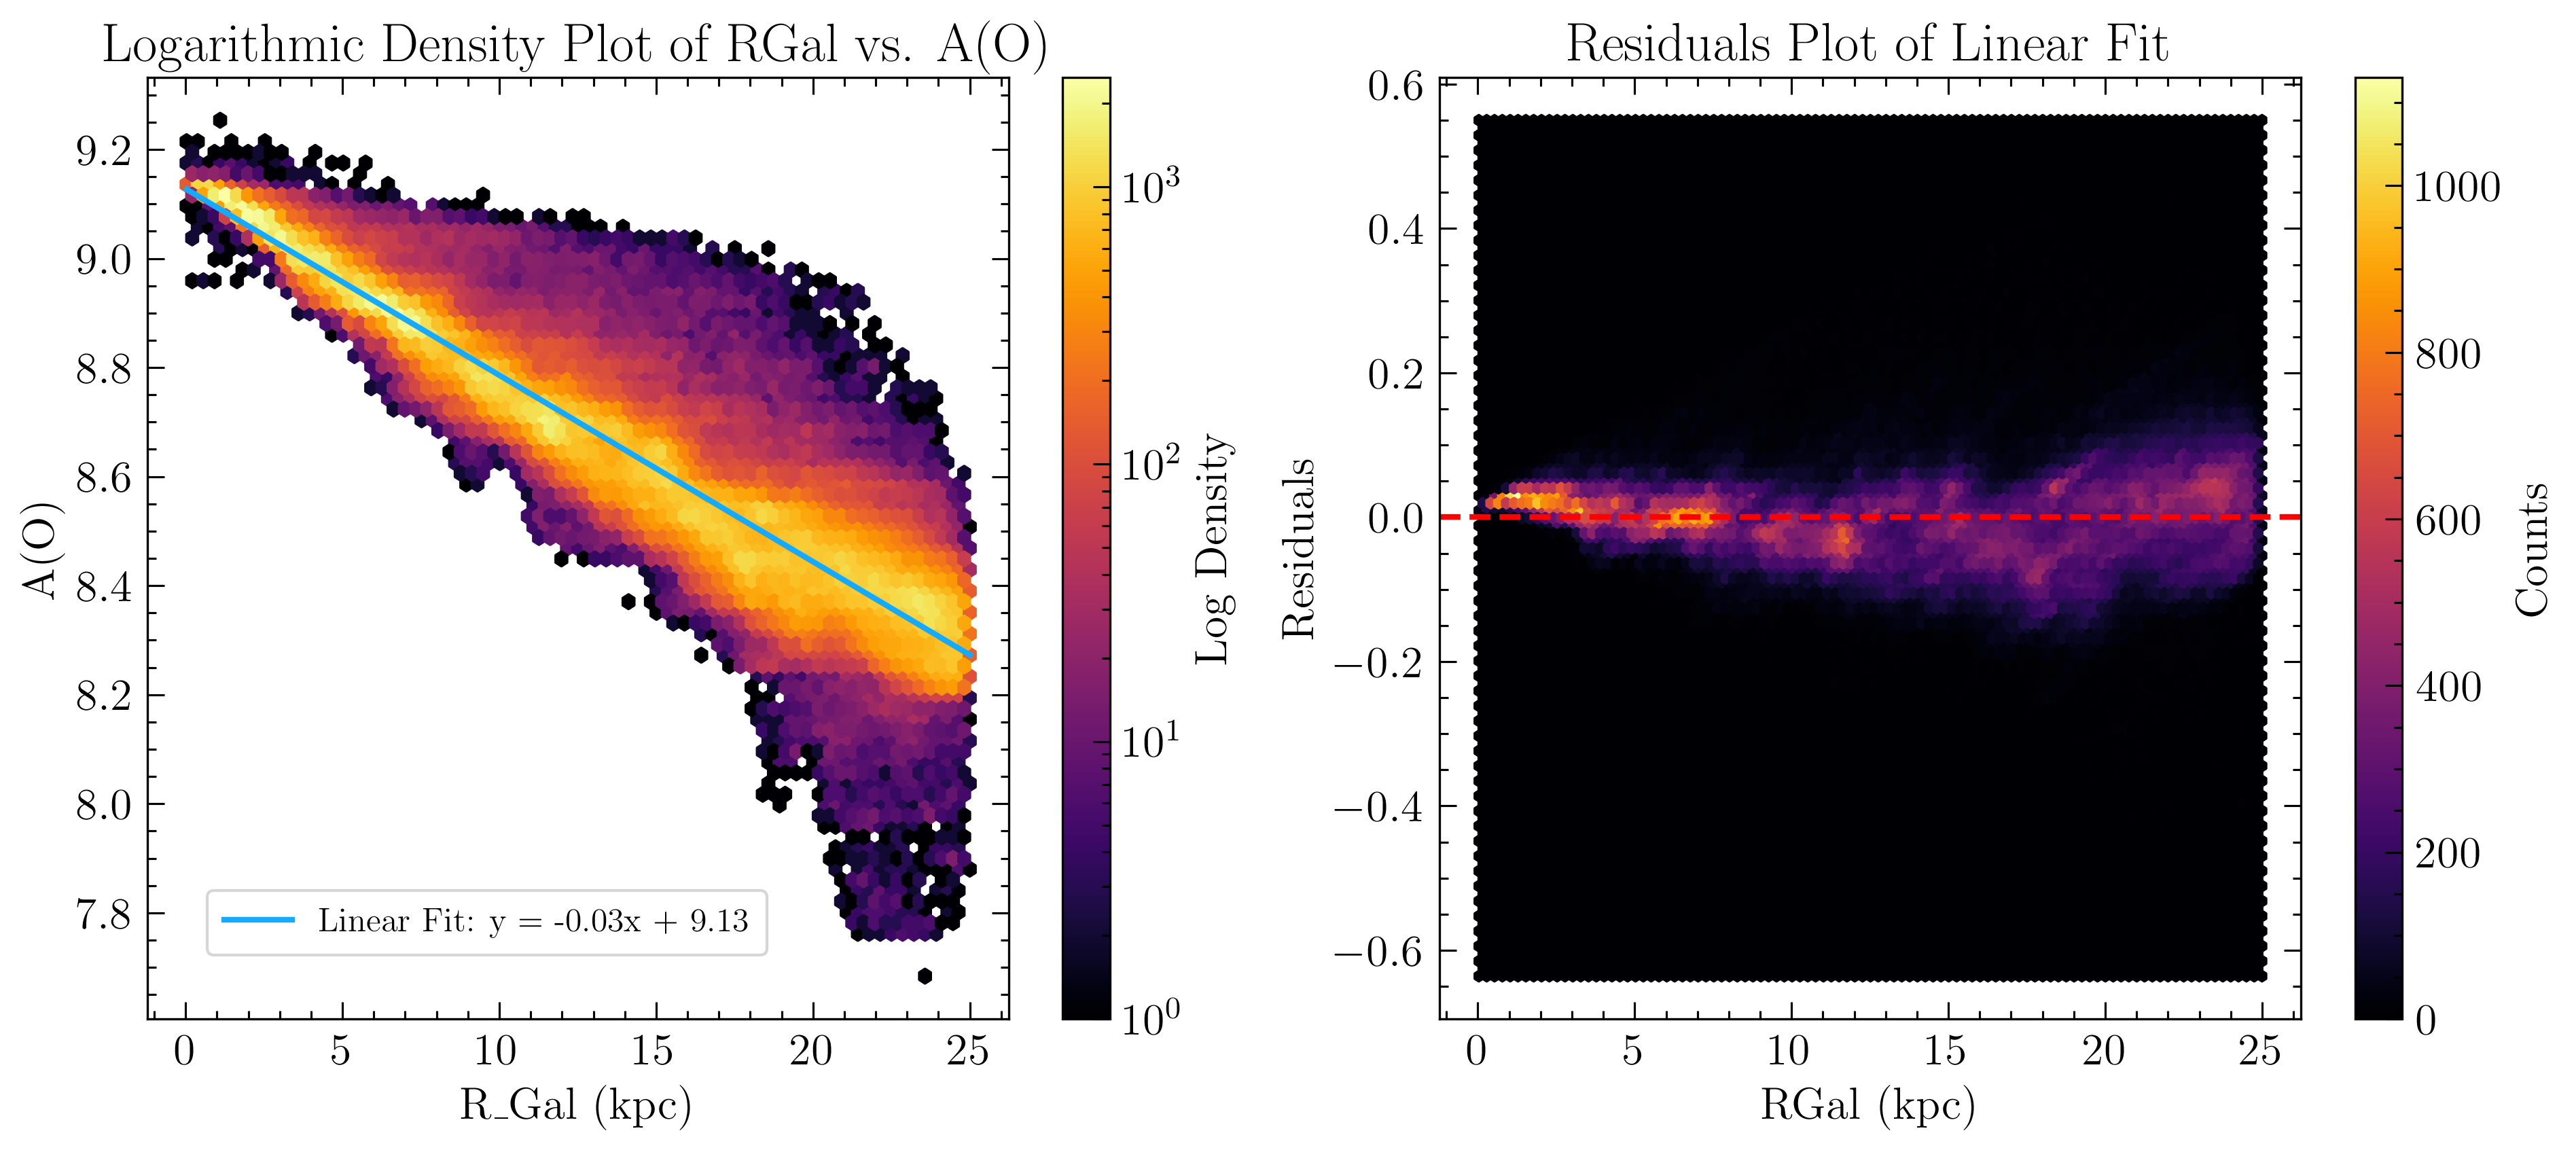

In [24]:
# Create the plot
# Create the figure
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)  # First subplot
ax2 = fig.add_subplot(122)  # Second subplot

# Creates log density plot of Rgal and metallicity
hb = ax1.hexbin(RGal, A_O, gridsize=mybins, cmap='inferno', bins='log')
#ax1.plot(RGal, A_O_fit, color=(0.078, 0.667, 1.0), linewidth=5,label='Linear Fit')
line, =ax1.plot(x_smooth, linear_fit, label='Linear Fit', color=(0.078, 0.667, 1.0))
ax1.set_xlabel('R_Gal (kpc)')
ax1.set_ylabel('A(O)')
ax1.set_title('Logarithmic Density Plot of RGal vs. A(O)')
fit_label = f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}'
ax1.legend([line],[fit_label],bbox_to_anchor=(0.05, 0.05),loc="lower left", frameon=True, borderpad=0.5,fontsize='12')

# Plots the residuals 
hb2 = ax2.hexbin(RGal, residuals, gridsize=100, cmap='inferno')
ax2.axhline(0, color='red', linestyle='--', label='Zero Residual')
ax2.set_xlabel('RGal (kpc)')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals Plot of Linear Fit')


plt.colorbar(hb, ax=ax1, label='Log Density')
plt.colorbar(hb2, ax=ax2, label='Counts')
plt.savefig('figures/RGal_vs_AO_residualswithcounts.png', bbox_inches='tight',dpi=200)
plt.show()
# Save the figure

plt.close()  # Close the figure to free memory

#### Discuss where the linear model fits well and where it does not. Use statistical metrics, such as the root mean squares or other goodness-of-fit indicators, to quantify the performance of your linear fit in general and regions with larger residuals.

In Overall we see the following:

In [25]:
'''
Calculates stats for entire R_gal; R_gal 0 to 25:
- Fits using statsmodels.api 
- Calulates R^2,RMSE,residuals, mean residuals and STD residuals
'''
x_with_intercept = sm.add_constant(RGal)
model = sm.OLS(A_O, x_with_intercept).fit()
rmse = np.sqrt(np.mean((A_O - model.predict(x_with_intercept))**2))
residuals = A_O - model.predict(x_with_intercept)
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
print(f'RMSE:{rmse}')
print(f'residuals:{mean_residual}')
print(f'Standard devation residual:{std_residual}')
model.summary()

2164680546.py: RMSE:0.07264613635487784
2164680546.py: residuals:-4.419861411490523e-15
2164680546.py: Standard devation residual:0.07264613635487785


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 5.337e+06
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:51:32   Log-Likelihood:             6.1547e+05
No. Observations:              511520   AIC:                        -1.231e+06
Df Residuals:                  511518   BIC:                        -1.231e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1278      0.000   3.93e+04      0.000       9.127       9.128
x1            -0.0342   1.48e-05  -2310.203      0.000      -0.034      -0.034
==============================================================================
Omnibus:                    66623.269   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           564064.307
Skew:                           0.349   Prob(JB):                         0.00
Kurtosis:                       8.097   Cond. No.                         36.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this we see large $R^{2}$ and a small RMSE which indicates the linear model is a good fit overall.  

However looking at the residenals plot we can see visually there seems to be more a spread at higher galactocentric
radius. So what we can do is split the radius into seperate regions into approximatley thirds of 0-9(inner) 10-17(middle) 18(outer) upwards:

Inner $R_{gal}$:

In [26]:
'''
Calculates stats for Inner R_gal; R_gal below 10:
- Fits using statsmodels.api 
- Calulates R^2,RMSE,residuals, mean residuals and STD residuals
'''
inner_mask = RGal < 10
inner_A_O = A_O[inner_mask]
inner_RGal = RGal[inner_mask]
inner_x_with_intercept = sm.add_constant(inner_RGal)
inner_model = sm.OLS(inner_A_O, inner_x_with_intercept).fit()
inner_rmse = np.sqrt(np.mean((inner_A_O - inner_model.predict(inner_x_with_intercept))**2))
inner_residuals = inner_A_O - inner_model.predict(inner_x_with_intercept)
inner_mean_residual = np.mean(inner_residuals)
inner_std_residual = np.std(inner_residuals)
print(f'inner RMSE:{inner_rmse}')
print(f'mean residuals:{inner_mean_residual}')
print(f'Inner Standard devation residual:{inner_std_residual}')
inner_model.summary()

1093125895.py: inner RMSE:0.04031952362053302
1093125895.py: mean residuals:-1.998133323169134e-15
1093125895.py: Inner Standard devation residual:0.040319523620533024


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 9.734e+05
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:51:32   Log-Likelihood:             2.8642e+05
No. Observations:              159833   AIC:                        -5.728e+05
Df Residuals:                  159831   BIC:                        -5.728e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1592      0.000   3.78e+04      0.000       9.159       9.160
x1            -0.0385    3.9e-05   -986.616      0.000      -0.039      -0.038
==============================================================================
Omnibus:                    39642.624   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244316.993
Skew:                           1.052   Prob(JB):                         0.00
Kurtosis:                       8.680   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this we can see that our $R^2$ is large and our RMSE is small which indicates the linear model in the inner $R_{gal}$ is a good fit

As for the Middle $R_{gal}$ we find:

In [27]:
'''
Calculates stats for Middle R_gal; R_gal between 10 and 17:
- Fits using statsmodels.api 
- Calulates R^2,RMSE,residuals, mean residuals and STD residuals
'''
middle_mask = (RGal >= 10) & (RGal < 18)
middle_A_O = A_O[middle_mask]
middle_RGal = RGal[middle_mask]
middle_x_with_intercept = sm.add_constant(middle_RGal)
middle_model = sm.OLS(middle_A_O, middle_x_with_intercept).fit()
middle_rmse = np.sqrt(np.mean((middle_A_O - middle_model.predict(middle_x_with_intercept))**2))
middle_residuals = middle_A_O - middle_model.predict(middle_x_with_intercept)
middle_mean_residual = np.mean(middle_residuals)
middle_std_residual = np.std(middle_residuals)
print(f'Middle RMSE:{middle_rmse}')
print(f'Middle mean residuals:{middle_mean_residual}')
print(f'Middle Standard devation residual:{middle_std_residual}')
middle_model.summary()

1915215041.py: Middle RMSE:0.07525636294549219
1915215041.py: Middle mean residuals:5.224346196689263e-15
1915215041.py: Middle Standard devation residual:0.07525636294549218


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 2.091e+05
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:51:32   Log-Likelihood:             1.9715e+05
No. Observations:              168808   AIC:                        -3.943e+05
Df Residuals:                  168806   BIC:                        -3.943e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1414      0.001   8046.322      0.000       9.139       9.144
x1            -0.0362   7.92e-05   -457.316      0.000      -0.036      -0.036
==============================================================================
Omnibus:                    46468.232   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185496.388
Skew:                           1.323   Prob(JB):                         0.00
Kurtosis:                       7.401   Cond. No.                         89.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we start seeing a difference within the middle $R_{gal}$ we find again a low RMSE but increasing when compared to the inner $R_{gal}$ and an $R^{2}$ is around 0.553 which indicates the model as a moderate fit within the middle $R_{gal}$

Finally for the Outer $R_{gal}$ we find:

In [28]:
'''
Calculates stats for Outer R_gal; R_gal between 18 and above:
- Fits using statsmodels.api 
- Calulates R^2,RMSE,residuals, mean residuals and STD residuals
'''
outer_mask = RGal >= 18
outer_A_O = A_O[outer_mask]
outer_RGal = RGal[outer_mask]
outer_x_with_intercept = sm.add_constant(outer_RGal)
outer_model = sm.OLS(outer_A_O, outer_x_with_intercept).fit()
outer_rmse = np.sqrt(np.mean((outer_A_O - outer_model.predict(outer_x_with_intercept))**2))
outer_residuals = outer_A_O - outer_model.predict(outer_x_with_intercept)
outer_mean_residual = np.mean(outer_residuals)
outer_std_residual = np.std(outer_residuals)
print(f'Outer RMSE:{outer_rmse}')
print(f'Outer mean residuals:{outer_mean_residual}')
print(f'Outer Standard devation residual:{outer_std_residual}')
outer_model.summary()

2693066460.py: Outer RMSE:0.0860962238790316
2693066460.py: Outer mean residuals:9.843059983785113e-16
2693066460.py: Outer Standard devation residual:0.0860962238790316


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 6.616e+04
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:51:32   Log-Likelihood:             1.8898e+05
No. Observations:              182879   AIC:                        -3.780e+05
Df Residuals:                  182877   BIC:                        -3.779e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9599      0.002   4106.788      0.000       8.956       8.964
x1            -0.0260      0.000   -257.219      0.000      -0.026      -0.026
==============================================================================
Omnibus:                    19842.832   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172694.516
Skew:                          -0.142   Prob(JB):                         0.00
Kurtosis:                       7.752   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find that while low the RMSE has continued increasing when compared to the inner and middle $R_{gal}$ also we find the outer $R_{gal}$ $R^{2}$ is low these indicates the outer $R_{gal}$ has a bad fit to the linear fit

So we find:
- Inner $R_{gal}$ is good fit
- Middle $R_{gal}$ is a okay fit
- Outer  $R_{gal}$ is a bad fit

#### Plot a 3-panel figure for the x vs. y plane using the same bins and sensible colormaps:

- (a) 2D-histogram of the median simulated A(O)
- (b) 2D-histogram of the median fitted A(O)
- (c) 2D-histogram of the median residuals ∆A(O)

In [29]:
from scipy.stats import binned_statistic_2d

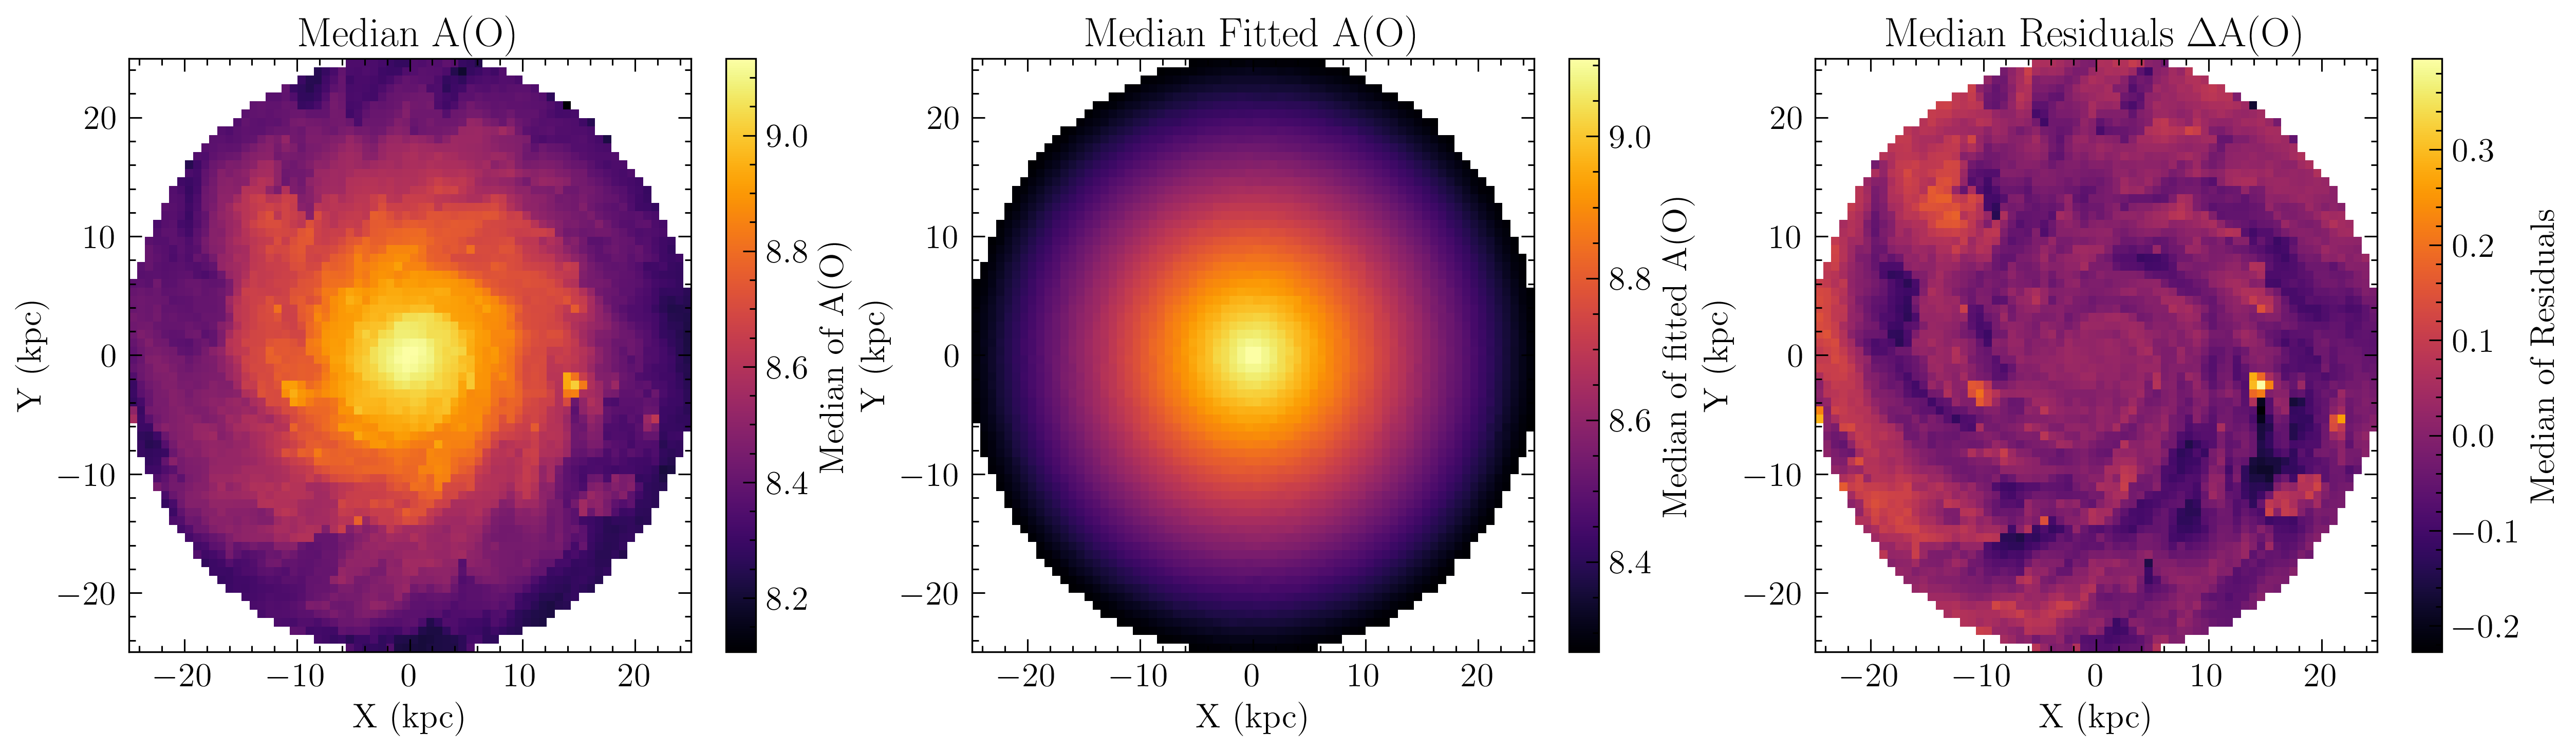

In [30]:
# Binned statistics for 2D histograms
median_AO, xedges, yedges, binnumber = binned_statistic_2d(x, y, A_O, statistic='median', bins=mybins)
median_fit, xedges, yedges, binnumber = binned_statistic_2d(x, y, linear_model.predict(x_with_intercept), statistic='median', bins=mybins)
median_residuals, xedges, yedges, binnumber = binned_statistic_2d(x, y, residuals, statistic='median', bins=mybins)



# Create figure for 2D histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# First panel: 2D Histogram (binned stats) colored by median A(O)
h1 = axs[0].imshow(median_AO.T, origin='lower',aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[0].set_title('Median A(O)')
axs[0].set_xlabel("X (kpc)")
axs[0].set_ylabel("Y (kpc)")
plt.colorbar(h1, ax=axs[0],label="Median of A(O)")

# Second panel: 2D Histogram (binned stats) colored by median fitted A(O)
h2 = axs[1].imshow(median_fit.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[1].set_title('Median Fitted A(O)')
axs[1].set_xlabel("X (kpc)")
axs[1].set_ylabel("Y (kpc)")
plt.colorbar(h2, ax=axs[1],label="Median of fitted A(O)")

# Third panel: 2D Histogram (binned stats) colored by median residuals
h3 = axs[2].imshow(median_residuals.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[2].set_title(r'Median Residuals $\Delta$A(O)')
axs[2].set_xlabel("X (kpc)")
axs[2].set_ylabel("Y (kpc)")
plt.colorbar(h3, ax=axs[2],label="Median of Residuals")

plt.savefig('figures/2D_histograms_AO.png', bbox_inches='tight',dpi=200)
plt.show()



#### Describe your choice of 2D bins. Discuss what details would be missed with fewer bins or problems encountered with more bins.

I found that around 70 bins was the best spot for bins as any higher that you start getting white artifating and so you start lossing the picture of your galaxy.

As we can see below in this extreme example:

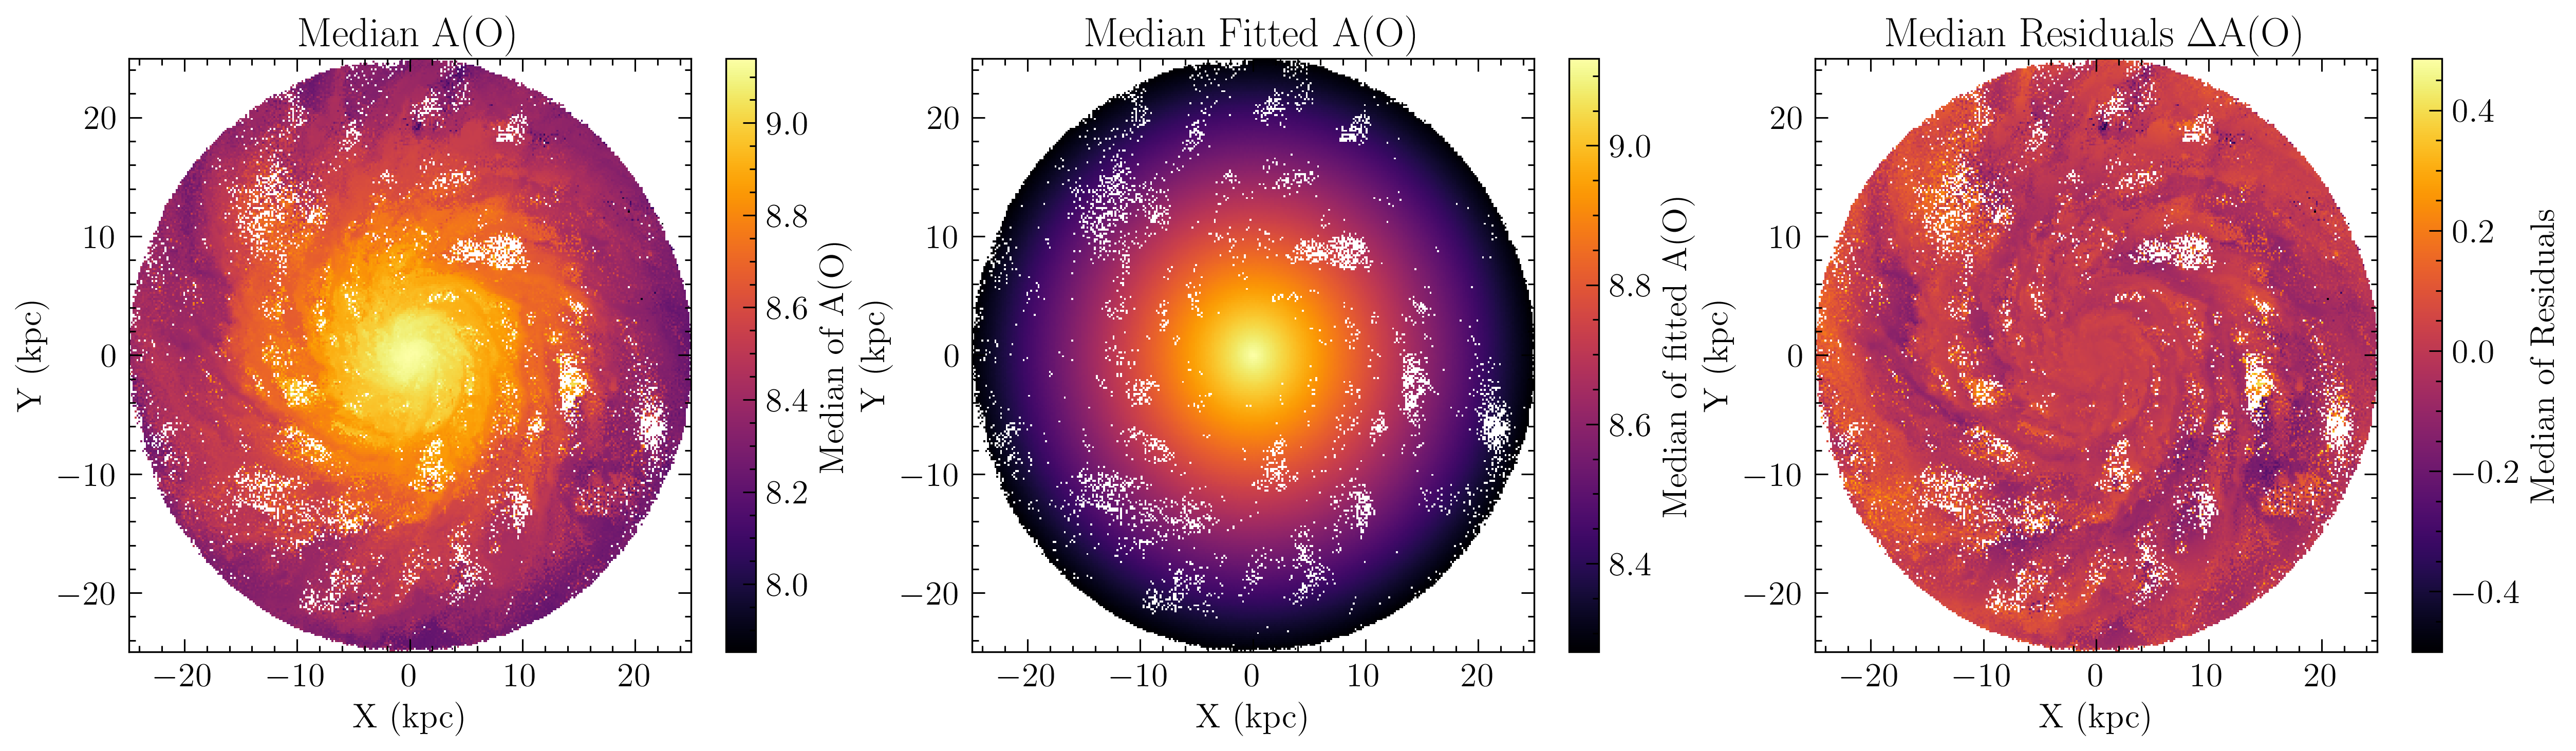

In [31]:
to_high_bins = 300

 
# Binned statistics for 2D histograms
high_bins_median_AO, xedges, yedges, binnumber = binned_statistic_2d(x, y, A_O, statistic='median', bins=to_high_bins)
high_bins_median_fit, xedges, yedges, binnumber = binned_statistic_2d(x, y, linear_model.predict(x_with_intercept), statistic='median', bins=to_high_bins)
high_bins_median_residuals, xedges, yedges, binnumber = binned_statistic_2d(x, y, residuals, statistic='median', bins=to_high_bins)



# Create figure for 2D histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# First panel: 2D Histogram (binned stats) colored by median A(O)
h1 = axs[0].imshow(high_bins_median_AO.T, origin='lower',aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[0].set_title('Median A(O)')
axs[0].set_xlabel("X (kpc)")
axs[0].set_ylabel("Y (kpc)")
plt.colorbar(h1, ax=axs[0],label="Median of A(O)")

# Second panel: 2D Histogram (binned stats) colored by median fitted A(O)
h2 = axs[1].imshow(high_bins_median_fit.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[1].set_title('Median Fitted A(O)')
axs[1].set_xlabel("X (kpc)")
axs[1].set_ylabel("Y (kpc)")
plt.colorbar(h2, ax=axs[1],label="Median of fitted A(O)")

# Third panel: 2D Histogram (binned stats) colored by median residuals
h3 = axs[2].imshow(high_bins_median_residuals.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[2].set_title(r'Median Residuals $\Delta$A(O)')
axs[2].set_xlabel("X (kpc)")
axs[2].set_ylabel("Y (kpc)")
plt.colorbar(h3, ax=axs[2],label="Median of Residuals")

plt.show()

Then you want to go low you will start to loss detail on spirals of the galaxy


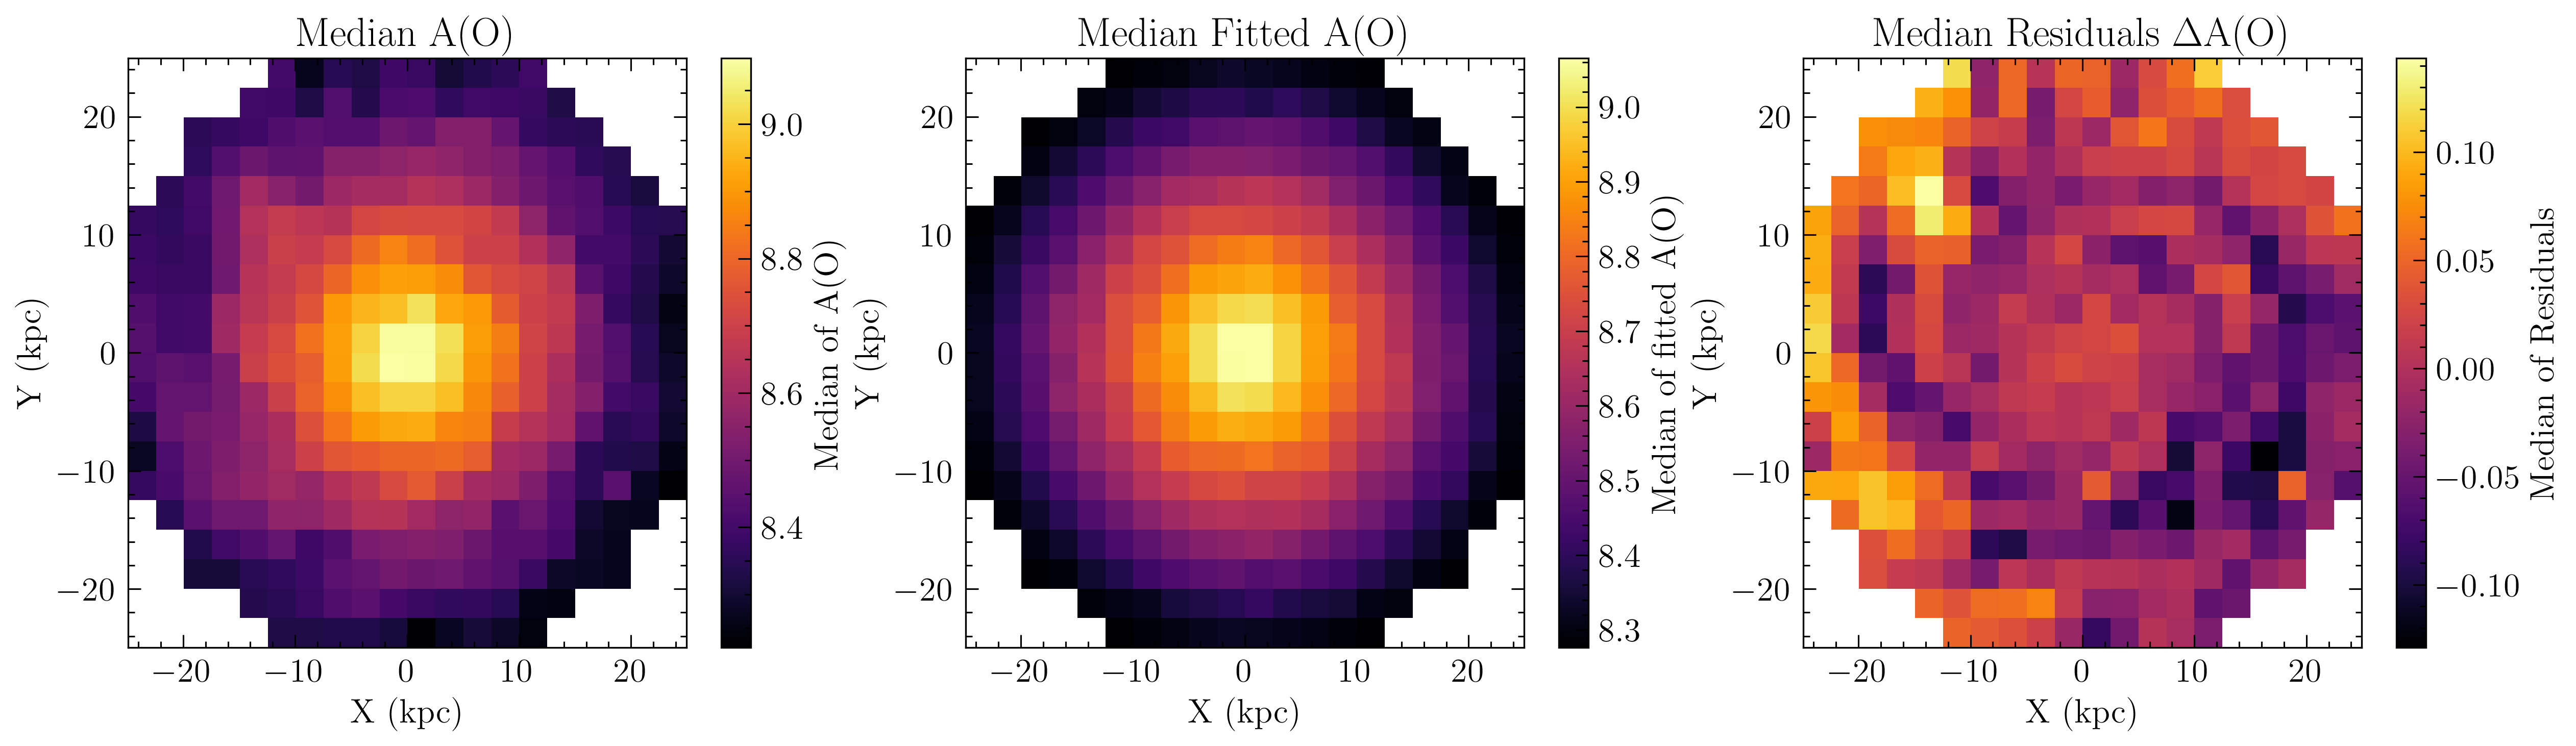

In [32]:
to_low_bins = 20

# Binned statistics for 2D histograms
low_bins_median_AO, xedges, yedges, binnumber = binned_statistic_2d(x, y, A_O, statistic='median', bins=to_low_bins )
low_bins_median_fit, xedges, yedges, binnumber = binned_statistic_2d(x, y, linear_model.predict(x_with_intercept), statistic='median', bins=to_low_bins )
low_bins_median_residuals, xedges, yedges, binnumber = binned_statistic_2d(x, y, residuals, statistic='median', bins=to_low_bins)



# Create figure for 2D histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# First panel: 2D Histogram (binned stats) colored by median A(O)
h1 = axs[0].imshow(low_bins_median_AO.T, origin='lower',aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[0].set_title('Median A(O)')
axs[0].set_xlabel("X (kpc)")
axs[0].set_ylabel("Y (kpc)")
plt.colorbar(h1, ax=axs[0],label="Median of A(O)")

# Second panel: 2D Histogram (binned stats) colored by median fitted A(O)
h2 = axs[1].imshow(low_bins_median_fit.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[1].set_title('Median Fitted A(O)')
axs[1].set_xlabel("X (kpc)")
axs[1].set_ylabel("Y (kpc)")
plt.colorbar(h2, ax=axs[1],label="Median of fitted A(O)")

# Third panel: 2D Histogram (binned stats) colored by median residuals
h3 = axs[2].imshow(low_bins_median_residuals.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[2].set_title(r'Median Residuals $\Delta$A(O)')
axs[2].set_xlabel("X (kpc)")
axs[2].set_ylabel("Y (kpc)")
plt.colorbar(h3, ax=axs[2],label="Median of Residuals")

plt.show()

So I settled on 70 as it had enough detail so I could tell it was a spiral galaxy and I wasn't losing some of picture of the metallicity distrubution due to the white artifacting at higher bins

#### Analyze the residuals in more detail and propose an explanation for any patterns you observe.

As we noticed earlier as we move further out our fit gets worse. This was also seen within the earlier residuals plot where there was a larger spread of the residuals at a larger $R_{gal}$. Now Looking at the median(see earlier plot) and mean plots see below: 

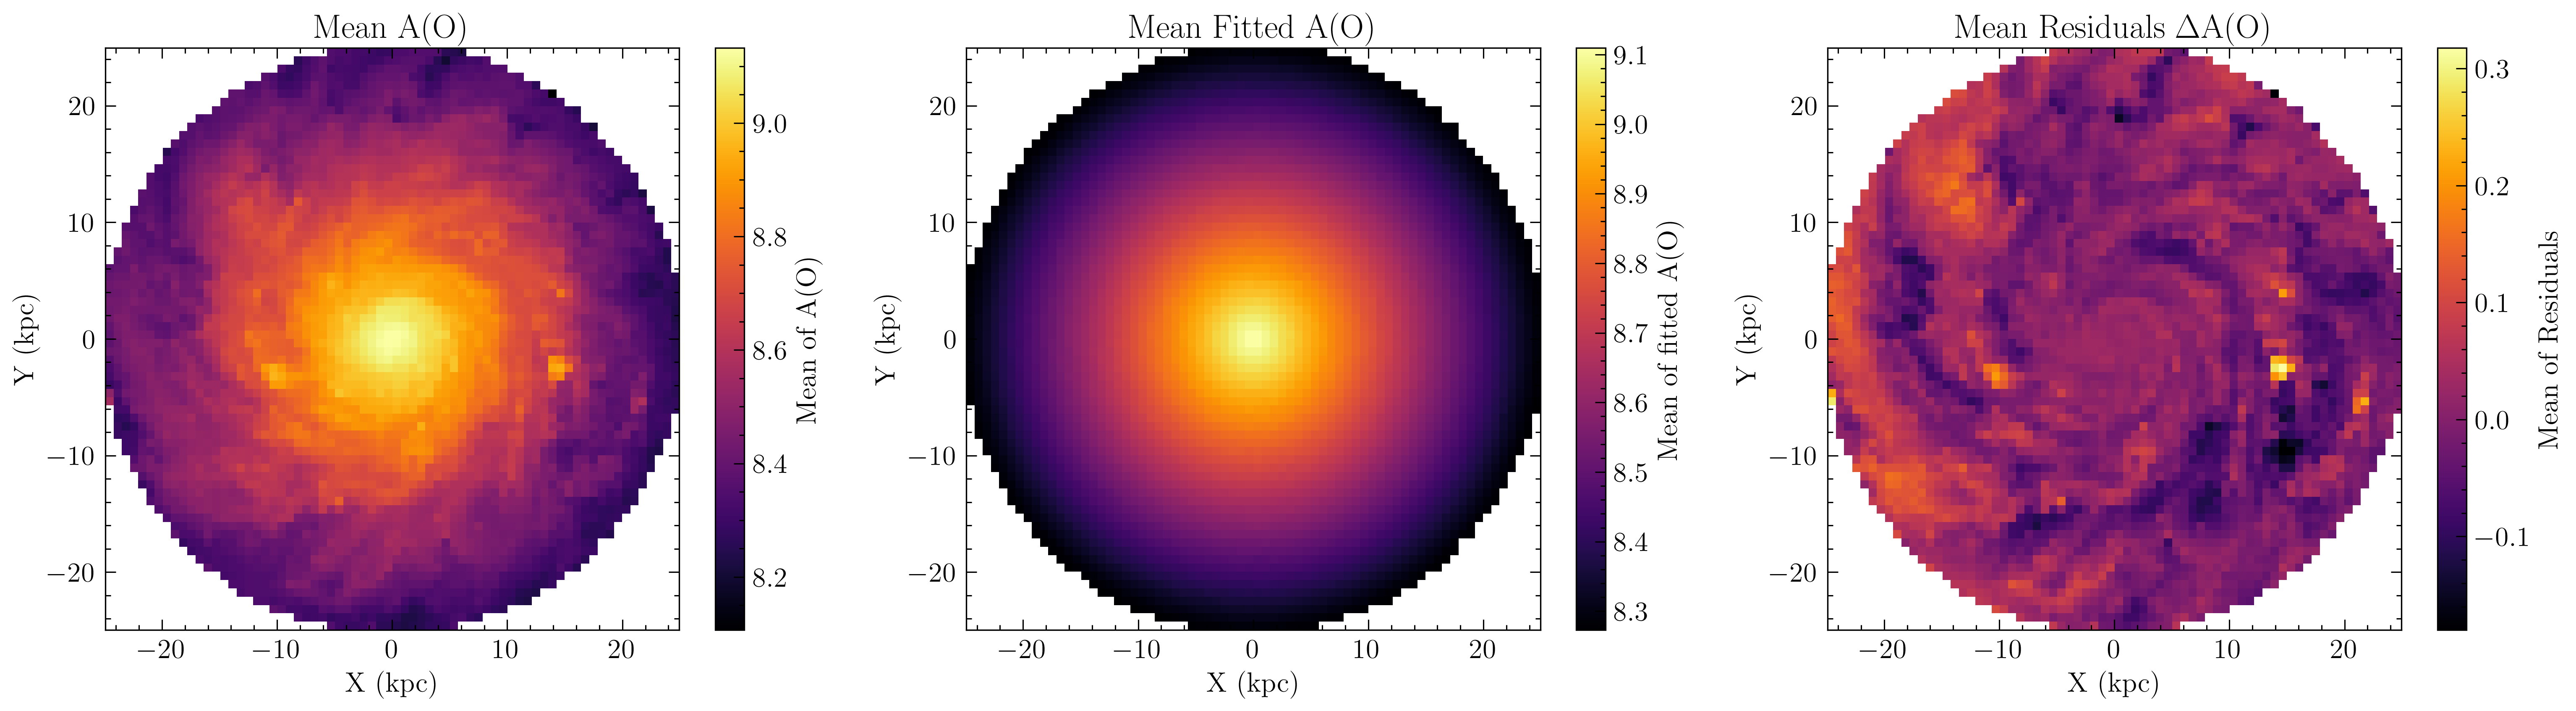

In [33]:
# Binned statistics for 2D histograms
mean_AO, xedges, yedges, binnumber = binned_statistic_2d(x, y, A_O, statistic='mean', bins=mybins)
mean_fit, xedges, yedges, binnumber = binned_statistic_2d(x, y, linear_model.predict(x_with_intercept), statistic='mean', bins=mybins)
mean_residuals, xedges, yedges, binnumber = binned_statistic_2d(x, y, residuals, statistic='mean', bins=mybins)



# Create figure for 2D histograms
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First panel: 2D Histogram (binned stats) colored by median A(O)
h1 = axs[0].imshow(mean_AO.T, origin='lower',aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[0].set_title('Mean A(O)')
axs[0].set_xlabel("X (kpc)")
axs[0].set_ylabel("Y (kpc)")
plt.colorbar(h1, ax=axs[0],label="Mean of A(O)")

# Second panel: 2D Histogram (binned stats) colored by median fitted A(O)
h2 = axs[1].imshow(mean_fit.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[1].set_title('Mean Fitted A(O)')
axs[1].set_xlabel("X (kpc)")
axs[1].set_ylabel("Y (kpc)")
plt.colorbar(h2, ax=axs[1],label="Mean of fitted A(O)")

# Third panel: 2D Histogram (binned stats) colored by median residuals
h3 = axs[2].imshow(mean_residuals.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[2].set_title(r'Mean Residuals $\Delta$A(O)')
axs[2].set_xlabel("X (kpc)")
axs[2].set_ylabel("Y (kpc)")
plt.colorbar(h3, ax=axs[2],label="Mean of Residuals")

plt.show()

We start seeing spiral patterns within the residials. Looking at the mean fitted plot we don't see these spiral patterns. This to me indicates the linear model doesn't take into account the way metallicity is distributed within the spiral arms of galaxies. Which naturally causes the bad fit as to the linear model. Further illustrating this galaxy is a spiral galaxy is by looking at the count: 

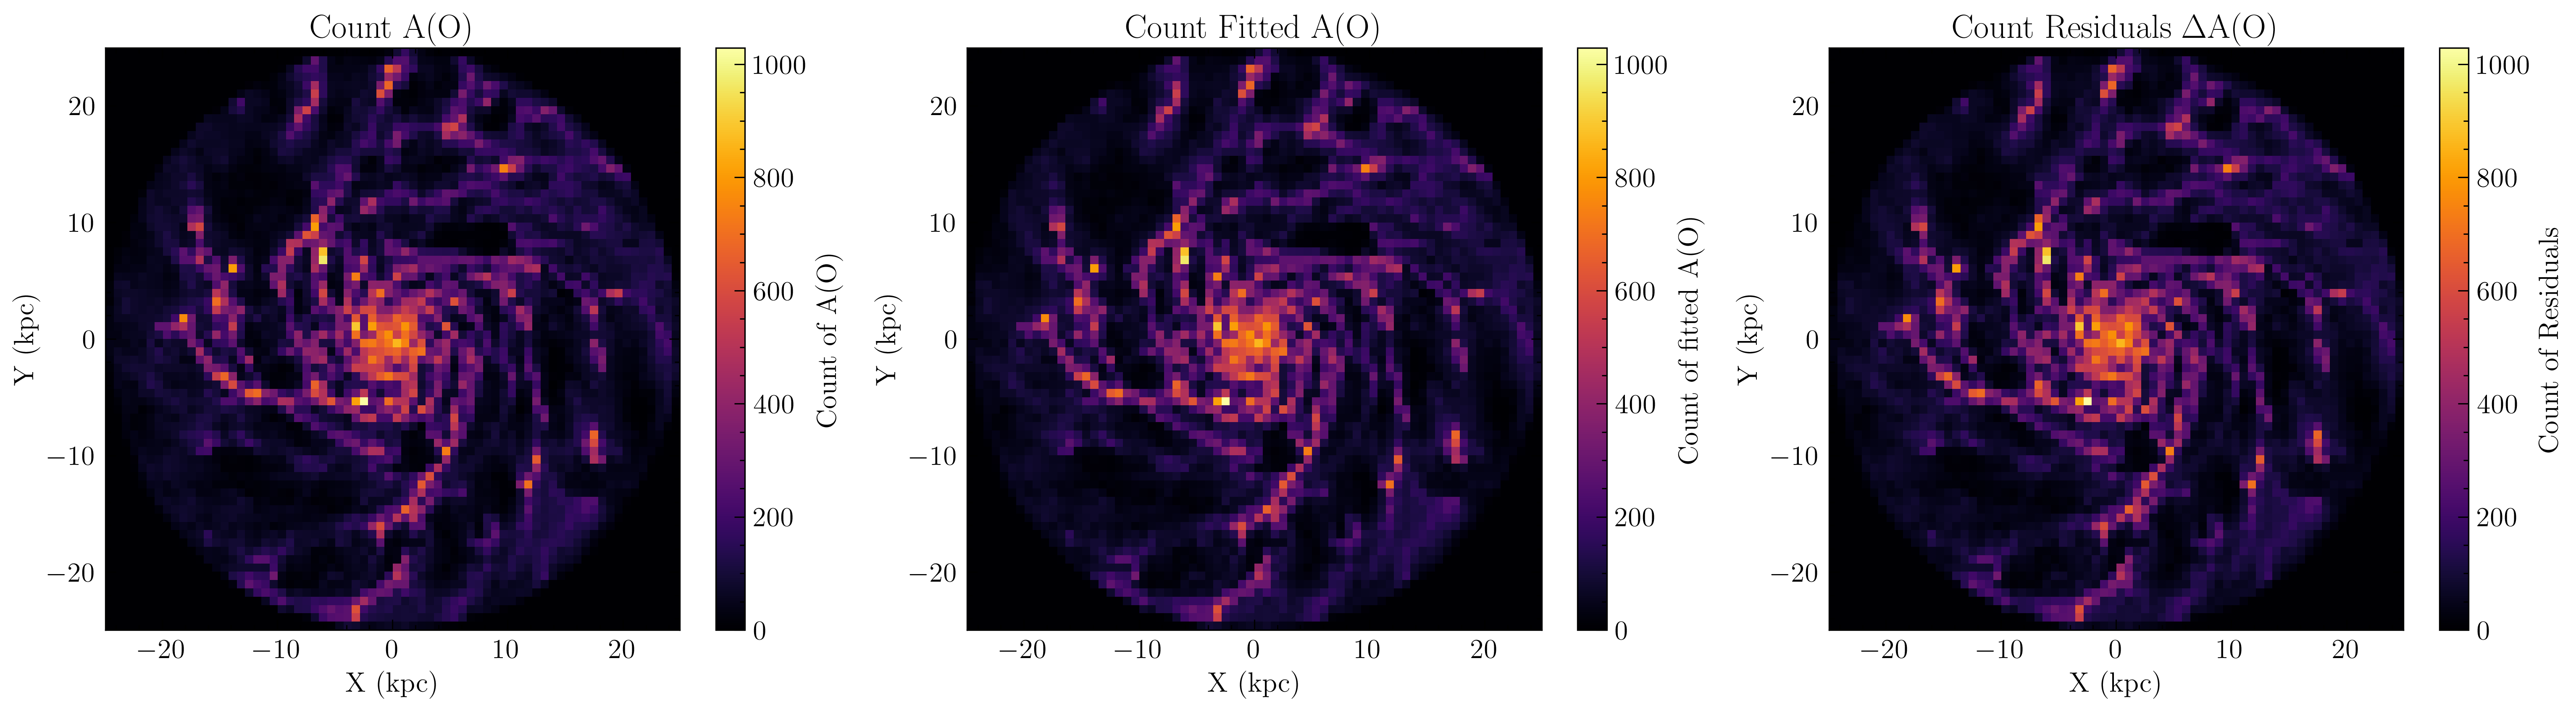

In [34]:
# Binned statistics for 2D histograms
count_AO, xedges, yedges, binnumber = binned_statistic_2d(x, y, A_O, statistic='count', bins=mybins)
count_fit, xedges, yedges, binnumber = binned_statistic_2d(x, y, linear_model.predict(x_with_intercept), statistic='count', bins=mybins)
count_residuals, xedges, yedges, binnumber = binned_statistic_2d(x, y, residuals, statistic='count', bins=mybins)



# Create figure for 2D histograms
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First panel: 2D Histogram (binned stats) colored by median A(O)
h1 = axs[0].imshow(count_AO.T, origin='lower',aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[0].set_title('Count A(O)')
axs[0].set_xlabel("X (kpc)")
axs[0].set_ylabel("Y (kpc)")
plt.colorbar(h1, ax=axs[0],label="Count of A(O)")

# Second panel: 2D Histogram (binned stats) colored by median fitted A(O)
h2 = axs[1].imshow(count_fit.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[1].set_title('Count Fitted A(O)')
axs[1].set_xlabel("X (kpc)")
axs[1].set_ylabel("Y (kpc)")
plt.colorbar(h2, ax=axs[1],label="Count of fitted A(O)")

# Third panel: 2D Histogram (binned stats) colored by median residuals
h3 = axs[2].imshow(count_residuals.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='inferno')
axs[2].set_title(r'Count Residuals $\Delta$A(O)')
axs[2].set_xlabel("X (kpc)")
axs[2].set_ylabel("Y (kpc)")
plt.colorbar(h3, ax=axs[2],label="Count of Residuals")

plt.show()

This is further renforced by looking at Ho et al (2015) paper where they talk about how spiral galaxies form chemically in an inside-out
fashion which would make sense if our model did a similar thing. As we get further out the metalcity changes giving us the residals we see. 

In [35]:
fits_file.close()